# Porto Seguro’s Safe Driver Prediction - Exp. Data Analysis (EDA)

### EDA Checklist
sources: http://data-knowledge.blogspot.com.br/2016/05/exploratory-data-analysis-checklist.html and https://bookdown.org/rdpeng/exdata/exploratory-data-analysis-checklist.html

1)  Formulate your question <br>
Formulating a question can be a useful way to guide the exploratory data analysis process and to limit the exponential number of 
paths that can be taken with any sizeable dataset. In particular, a sharp question or hypothesis can serve as a dimension 
reduction tool that can eliminate variables that are not immediately relevant to the question.

2)  Read in your data <br>
 Sometimes the data will come in a very messy format and you'll need to do some cleaning. Other times, someone else will have cleaned up that data for you so you'll be spared the pain of having to do the cleaning.

3)  Check the "packaging" <br>
That means to understand how the data is laid out. I.e number of rows and columns. Type of data in the dataset i.e.  strings, Booleans. In that way you familiarize yourself with the data and you might get some initial ideas on how to start with the analysis.

4)  Check your numbers <br>
 In general, counting things is usually a good way to figure out if anything is wrong or not. In the simplest case, if you're expecting there to be 1,000 observations and it turns out there's only 20, you know something must have gone wrong somewhere. But there are other areas that you can check depending on your application

5)  Validate with at least one external data source <br>
Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. For example if you are dealing with commodity trading, it might be worthwhile to check whether the data provided to you is in Euros, dollars or Yen however in the Yen case it should be very obvious.

6)  Make a plot <br>
There are two key reasons for making a plot of your data. They are creating expectations and checking deviations from expectations. Making a plot to visualize your data is a good way to further your understanding of your question and your data. Plotting can occur at different stages of a data analysis. For example, plotting may occur at the exploratory phase or later on in the presentation/communication phase.

### Important steps from the process, but not detailed in this script

7)  Try the easy solution first <br>
What's the simplest answer we could provide to this question? For the moment, don't worry about whether the answer is correct, but the point is how could you provide preliminary evidence for your hypothesis or question. You may refute that evidence later with deeper analysis, but this is the first pass. Importantly, if you do not find evidence of a signal in the data using just a simple plot or analysis, then often it is unlikely that you will find something using a more sophisticated analysis.

8)  Challenge your Solution <br>
Try and reach the same outcome using either a different kind of analysis, a different set of data or in some cases, reconsider any assumptions you made.

### What we know about the dataset so far...
- This dataset contains information about cars only; <br>
- Null values were filled with '-1';  <br>
- Features with 'reg' (region) in their name represents qualities of regions on continuous/ordinal scale; <br>
- "Ind" features are related to individual or driver, "reg" features are related to region, "car" features are related to car itself and "calc" features are calculated features;  <br>
- The presence of binary features come from answers with only two levels. <br>

### 1) Formulating your Question

In Porto Seguro’s competition, we’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.

To begin, we can ask some questions about the data...<br>
1) How is the data available? <br>
2) This data is balanced? <br>

In [1]:
#Importing Data Analysis Libs
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2) Read in your data 

In [2]:
#Getting train and test data
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')

### 3) Check the "packaging" 

In [3]:
dfTrain.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
dfTest.head(5)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [5]:
dfTrain.shape

(595212, 59)

In [6]:
dfTest.shape

(892816, 58)

In [7]:
dfTrain.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [8]:
dfTest.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

About the columns available in train and test datasets, the difference between them is just the column 'target', used to train the prediction models that will be created later.

In [9]:
dfTrain.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dfTest.describe()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,8.928160e+05,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,...,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,7.441535e+05,1.902371,1.358613,4.413734,0.417361,0.408132,0.393246,0.257191,0.163659,0.185905,...,5.438478,1.440265,2.875013,7.540367,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,4.296830e+05,1.986503,0.663002,2.700149,0.493453,1.355068,0.488471,0.437086,0.369966,0.389030,...,2.330081,1.200620,1.694072,2.745882,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.720218e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.443070e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.116308e+06,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488026e+06,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,20.000000,11.000000,15.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
dfTrain.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [12]:
dfTest.dtypes

id                  int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01  

In [13]:
#Qtd of Columns by type
trainFloat = dfTrain.select_dtypes(include=['float64']) #ordinal data
trainInt = dfTrain.select_dtypes(include=['int64']) #interval/continuous data
sizeTrainFloat = trainFloat.columns.size
sizeTrainInt = trainInt.columns.size

testFloat = dfTest.select_dtypes(include=['float64'])
testInt = dfTest.select_dtypes(include=['int64'])
sizeTestFloat = testFloat.columns.size
sizeTestInt = testInt.columns.size

print("Train - # of Float Columns: %d , # of Int Columns: %d " % (sizeTrainFloat,sizeTrainInt))
print("Test - # of Float Columns: %d , # of Int Columns: %d " % (sizeTestFloat,sizeTestInt))

Train - # of Float Columns: 10 , # of Int Columns: 49 
Test - # of Float Columns: 10 , # of Int Columns: 48 


### 4) Check your numbers 

#### Is there any null values in datasets?

In [14]:
#Checking for null values
dfTrain.isnull().sum().sort_values(ascending=True)

id                0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_car_08_cat     0
ps_calc_05        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0
ps_calc_15_bin    0
ps_calc_16_bin    0
ps_calc_17_bin    0
ps_calc_18_bin    0
ps_calc_06        0
ps_calc_19_bin    0
ps_car_07_cat     0
ps_car_05_cat     0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_car_06_cat     0
ps_ind_12_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0


In [15]:
#Checking for null values
dfTest.isnull().sum().sort_values(ascending=True)

id                0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0
ps_calc_15_bin    0
ps_calc_16_bin    0
ps_calc_17_bin    0
ps_calc_18_bin    0
ps_car_09_cat     0
ps_car_08_cat     0
ps_car_07_cat     0
ps_car_06_cat     0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_calc_19_bin    0
ps_ind_13_bin     0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0


Without any transformation in train and test datasets, there are any columns with null values.<br> 
As informed in the discussion group of the competition, null values were filled with '-1'.

In [16]:
#Mark Missing Values - changing '-1' to NaN
dfTrain_v2 = dfTrain
dfTrain_v2 = dfTrain_v2.replace(-1, np.NaN)
dfTest_v2 = dfTest
dfTest_v2 = dfTest_v2.replace(-1, np.NaN)

In [17]:
dfTrain_v2.shape

(595212, 59)

In [18]:
#Showing columns with null values
x = dfTrain_v2.isnull().sum().sort_values(ascending=False)
y = len(dfTrain_v2) 
z = (x/y)*100
print(z)

ps_car_03_cat     69.089837
ps_car_05_cat     44.782531
ps_reg_03         18.106490
ps_car_14          7.160474
ps_car_07_cat      1.930237
ps_ind_05_cat      0.975955
ps_car_09_cat      0.095596
ps_ind_02_cat      0.036290
ps_car_01_cat      0.017977
ps_ind_04_cat      0.013945
ps_car_02_cat      0.000840
ps_car_11          0.000840
ps_car_12          0.000168
ps_ind_03          0.000000
ps_ind_18_bin      0.000000
target             0.000000
ps_ind_01          0.000000
ps_reg_02          0.000000
ps_reg_01          0.000000
ps_ind_16_bin      0.000000
ps_ind_17_bin      0.000000
ps_ind_15          0.000000
ps_car_04_cat      0.000000
ps_ind_13_bin      0.000000
ps_ind_12_bin      0.000000
ps_ind_11_bin      0.000000
ps_ind_10_bin      0.000000
ps_ind_09_bin      0.000000
ps_ind_08_bin      0.000000
ps_ind_07_bin      0.000000
ps_ind_06_bin      0.000000
ps_ind_14          0.000000
ps_calc_20_bin     0.000000
ps_car_06_cat      0.000000
ps_calc_19_bin     0.000000
ps_calc_18_bin     0

In [19]:
#Showing columns with null values
xT = dfTest_v2.isnull().sum().sort_values(ascending=False)
    
yT = len(dfTest_v2) 
zT = (xT/yT)*100

print(zT)

ps_car_03_cat     69.097216
ps_car_05_cat     44.842274
ps_reg_03         18.109442
ps_car_14          7.146489
ps_car_07_cat      1.941161
ps_ind_05_cat      0.975565
ps_car_09_cat      0.098229
ps_ind_02_cat      0.034386
ps_car_01_cat      0.017921
ps_ind_04_cat      0.016241
ps_car_02_cat      0.000560
ps_car_11          0.000112
ps_ind_16_bin      0.000000
ps_reg_02          0.000000
ps_reg_01          0.000000
ps_ind_18_bin      0.000000
ps_ind_17_bin      0.000000
ps_ind_14          0.000000
ps_ind_15          0.000000
ps_ind_13_bin      0.000000
ps_ind_12_bin      0.000000
ps_ind_11_bin      0.000000
ps_ind_10_bin      0.000000
ps_ind_09_bin      0.000000
ps_ind_08_bin      0.000000
ps_ind_07_bin      0.000000
ps_ind_06_bin      0.000000
ps_ind_03          0.000000
ps_ind_01          0.000000
ps_car_04_cat      0.000000
ps_calc_20_bin     0.000000
ps_car_06_cat      0.000000
ps_calc_07         0.000000
ps_calc_18_bin     0.000000
ps_calc_17_bin     0.000000
ps_calc_16_bin     0

Almost all the same features in train and test datasets(excluding ps_car_12 ) have similar % of null values

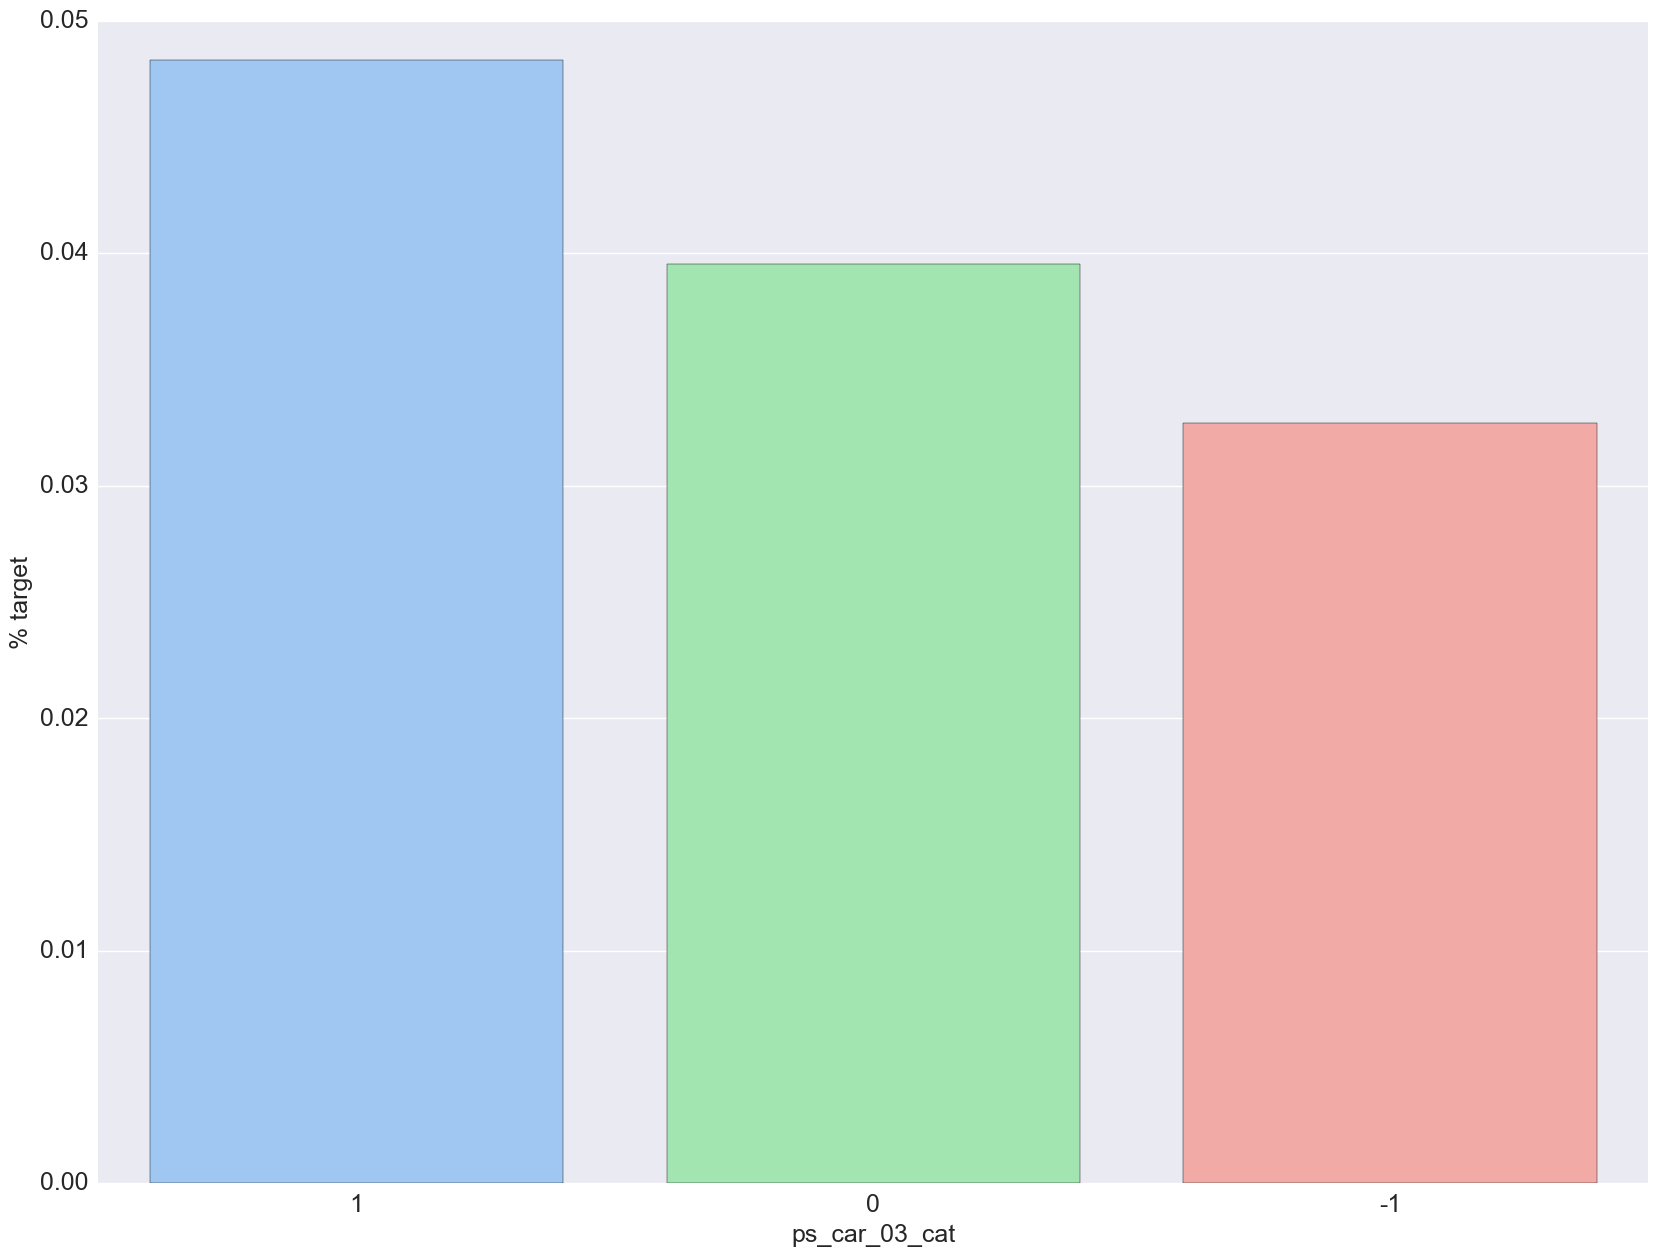

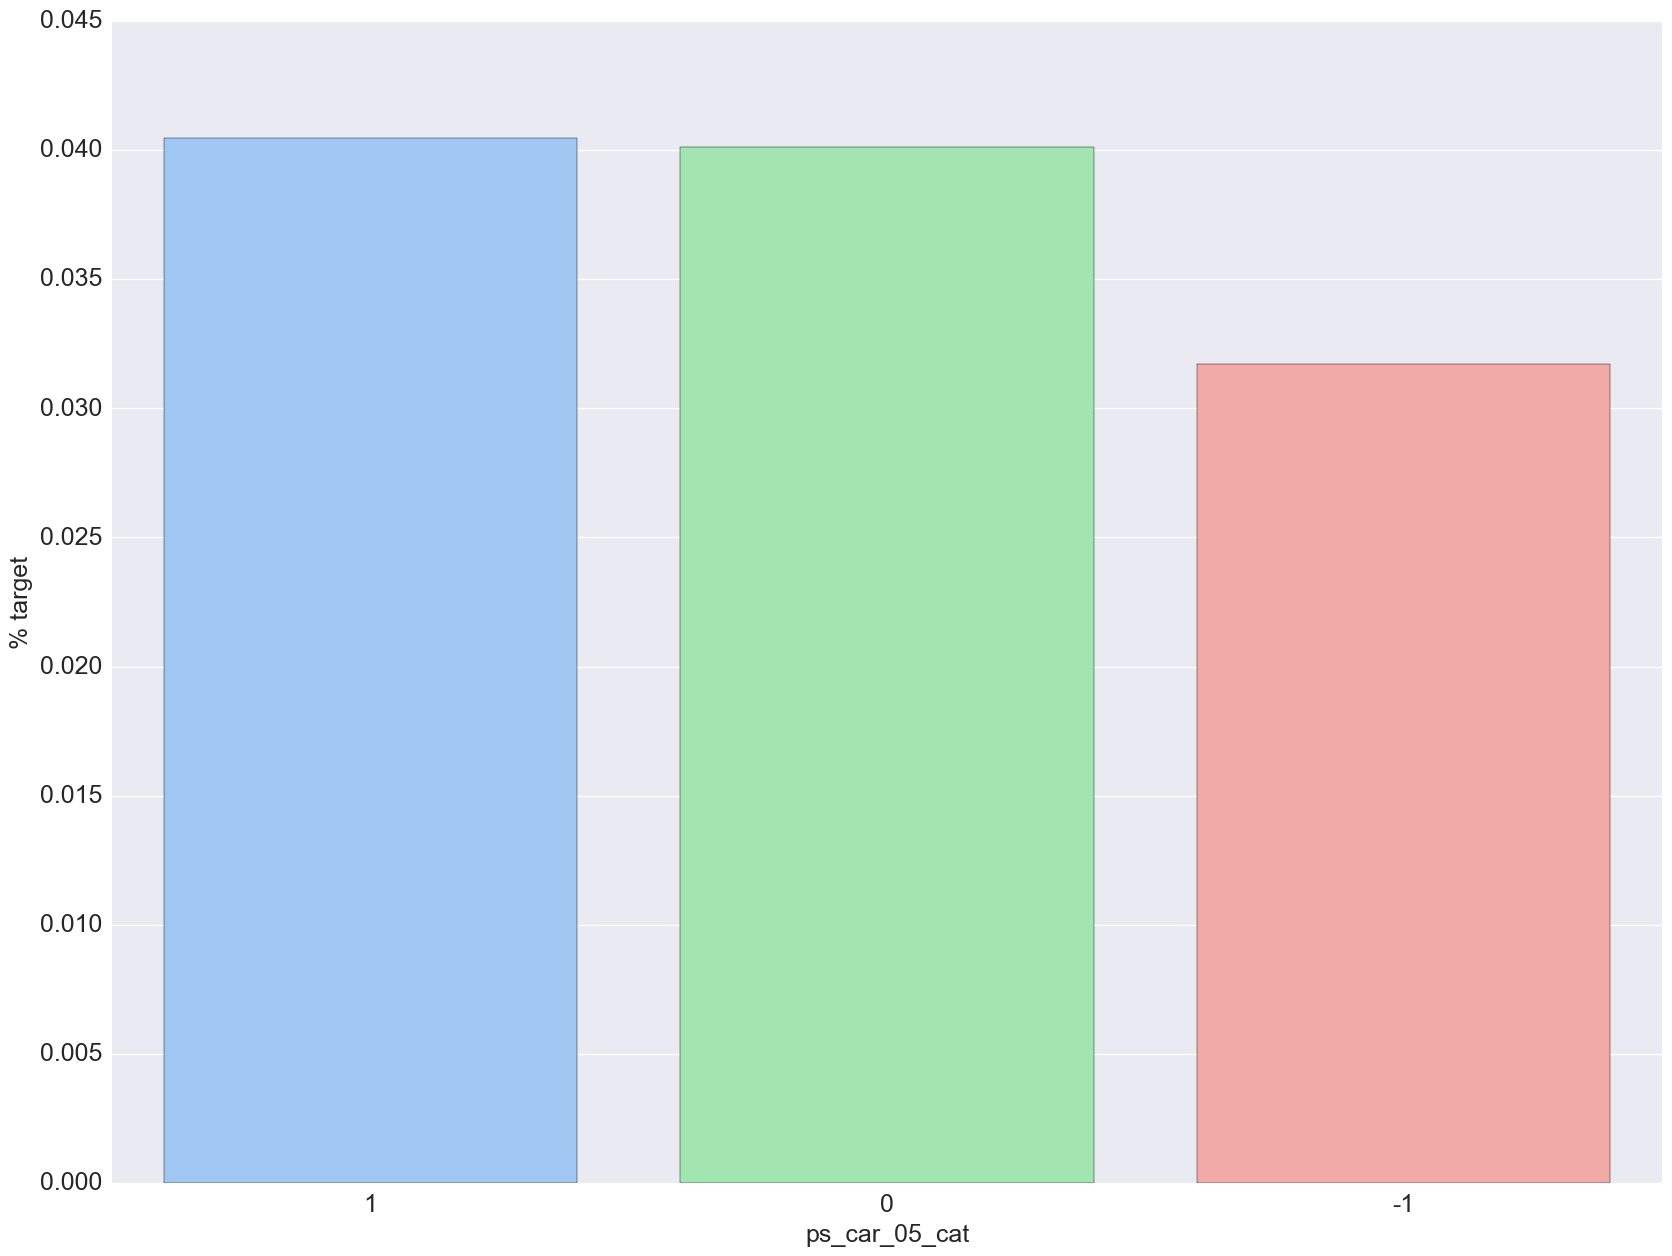

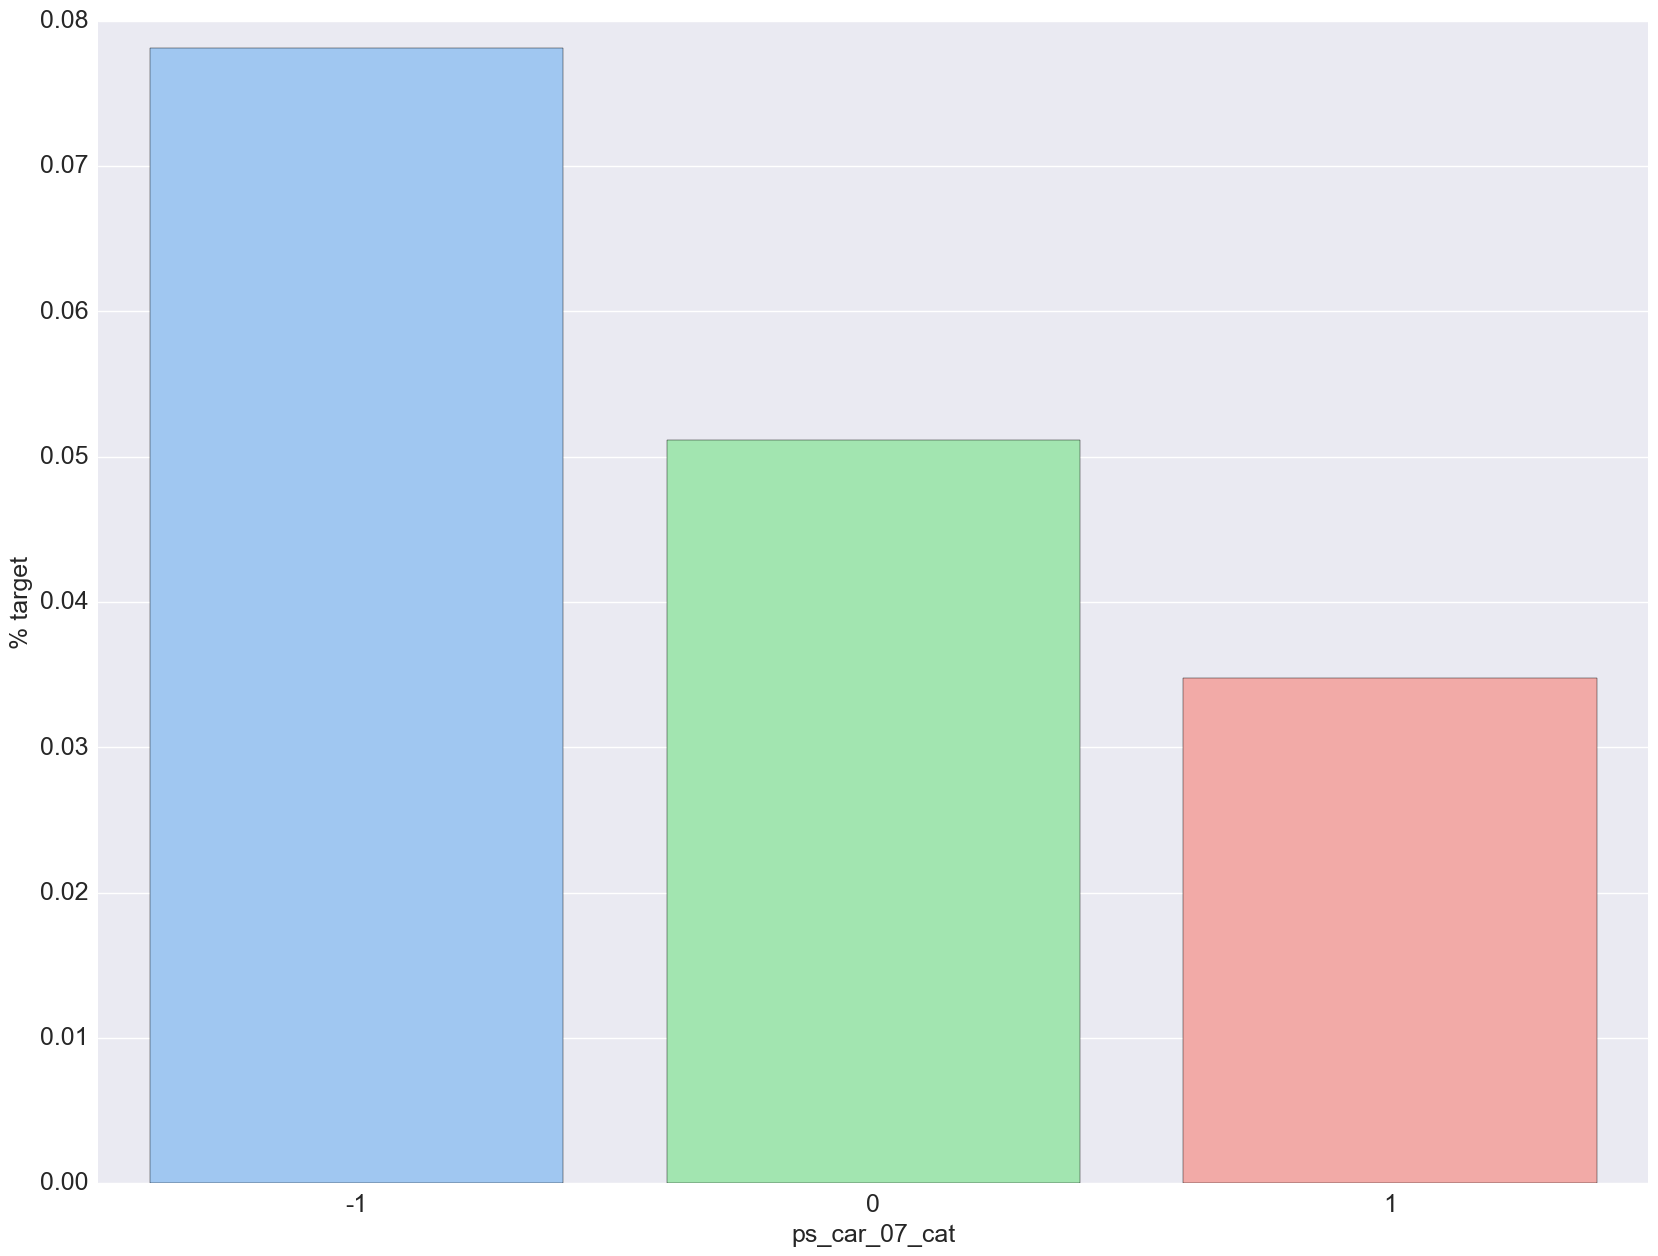

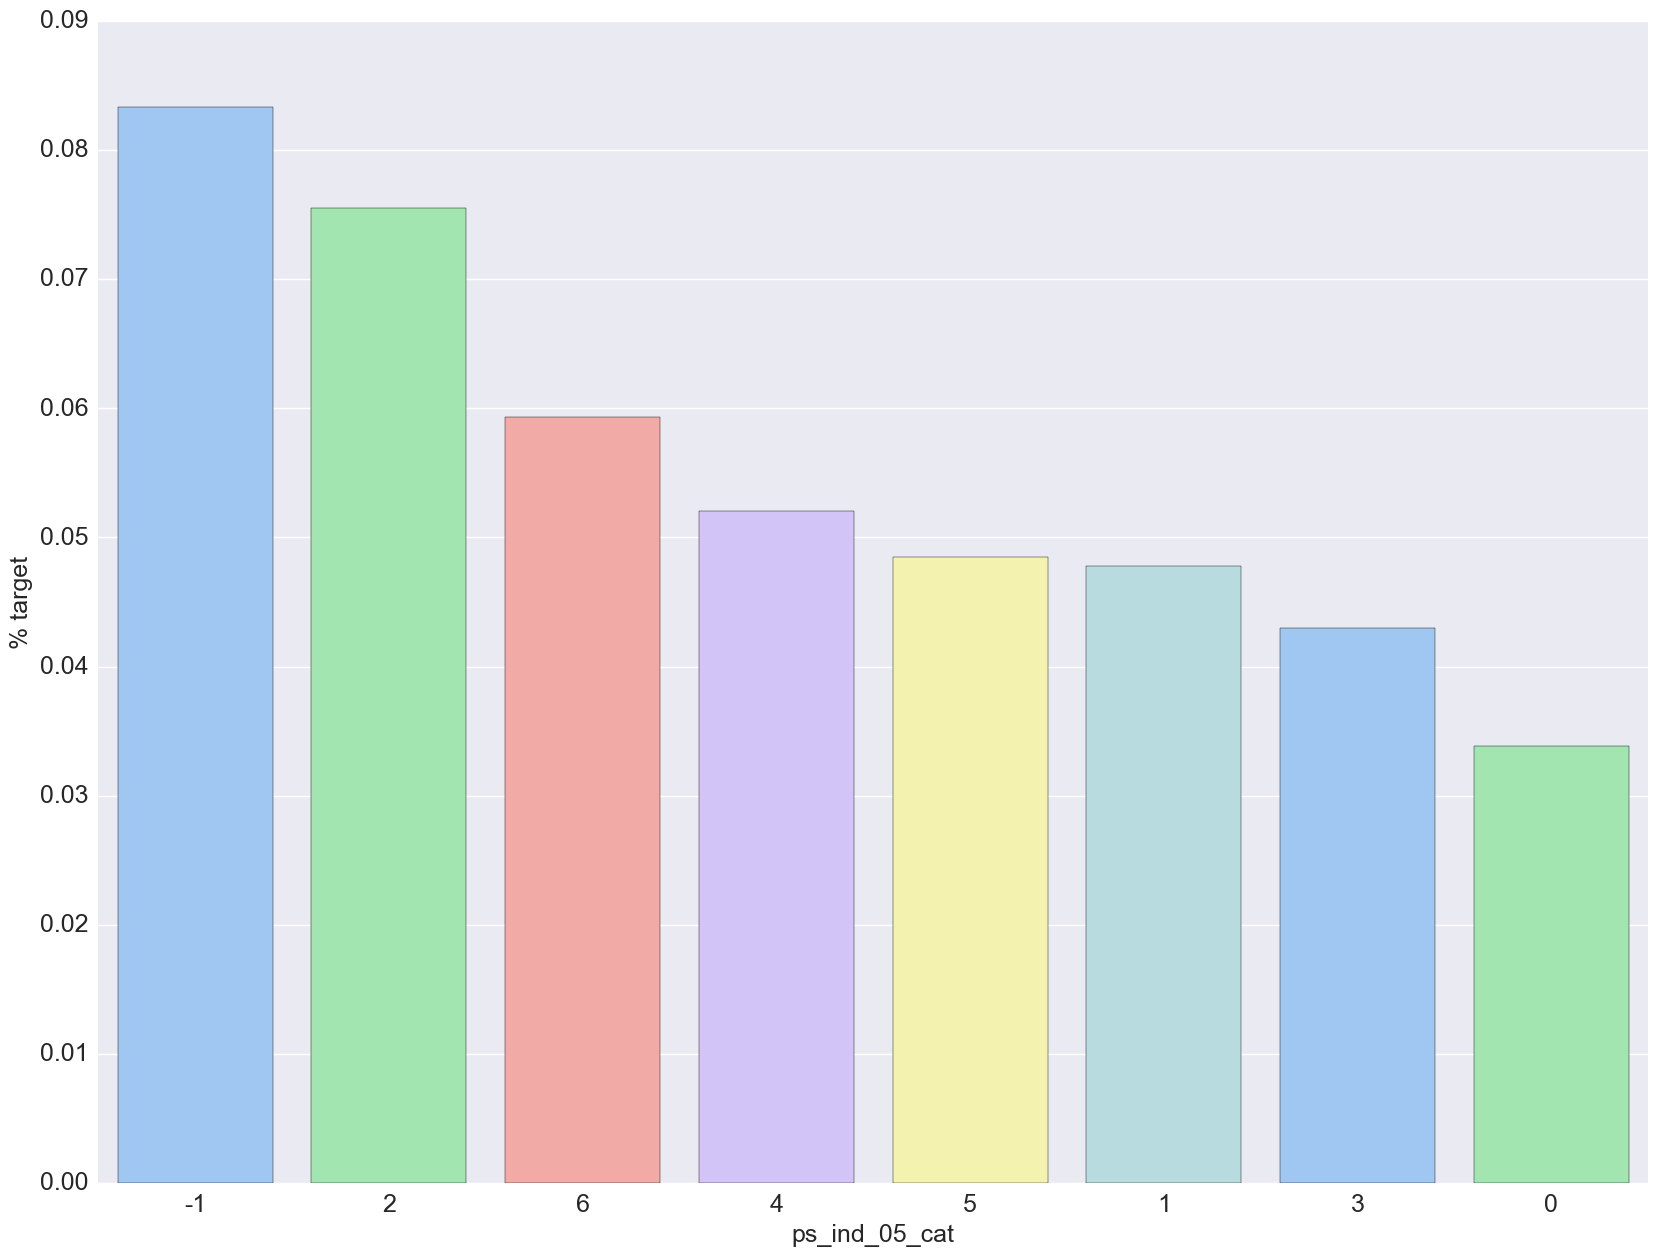

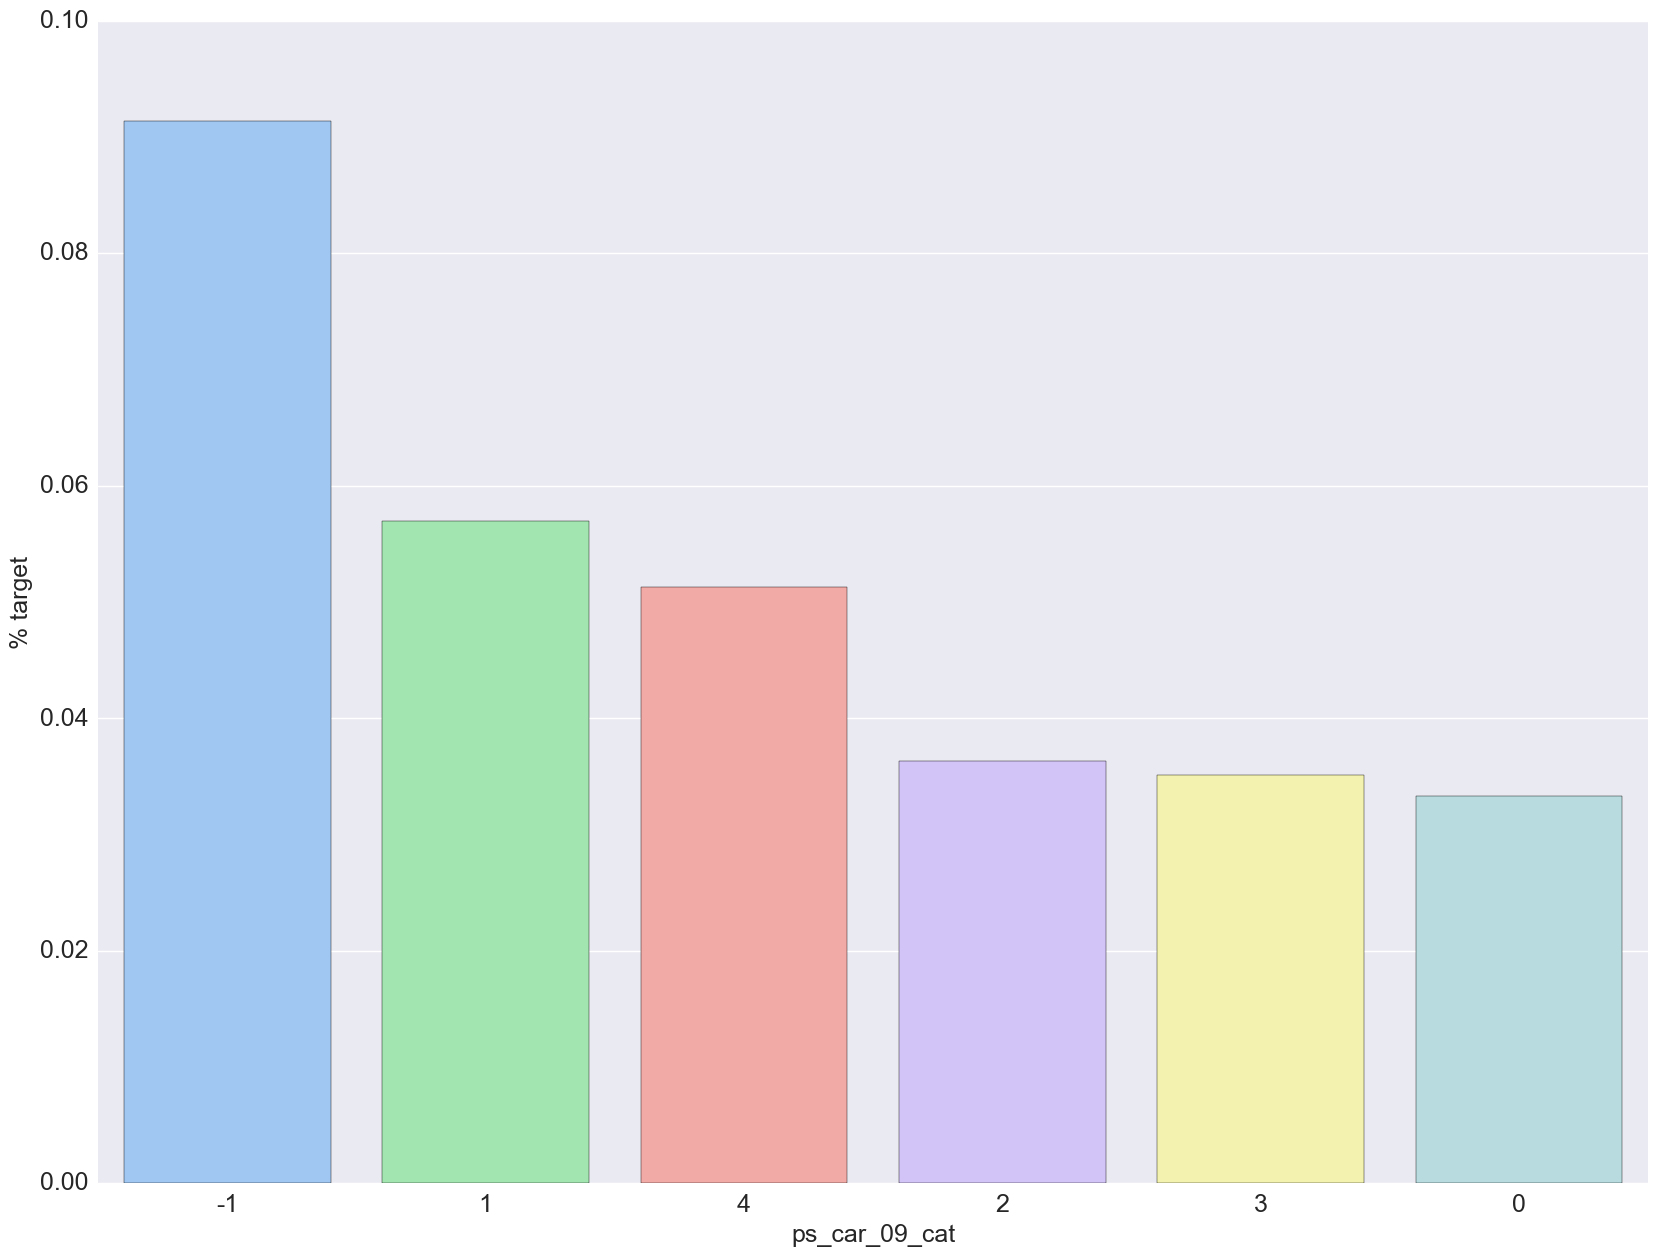

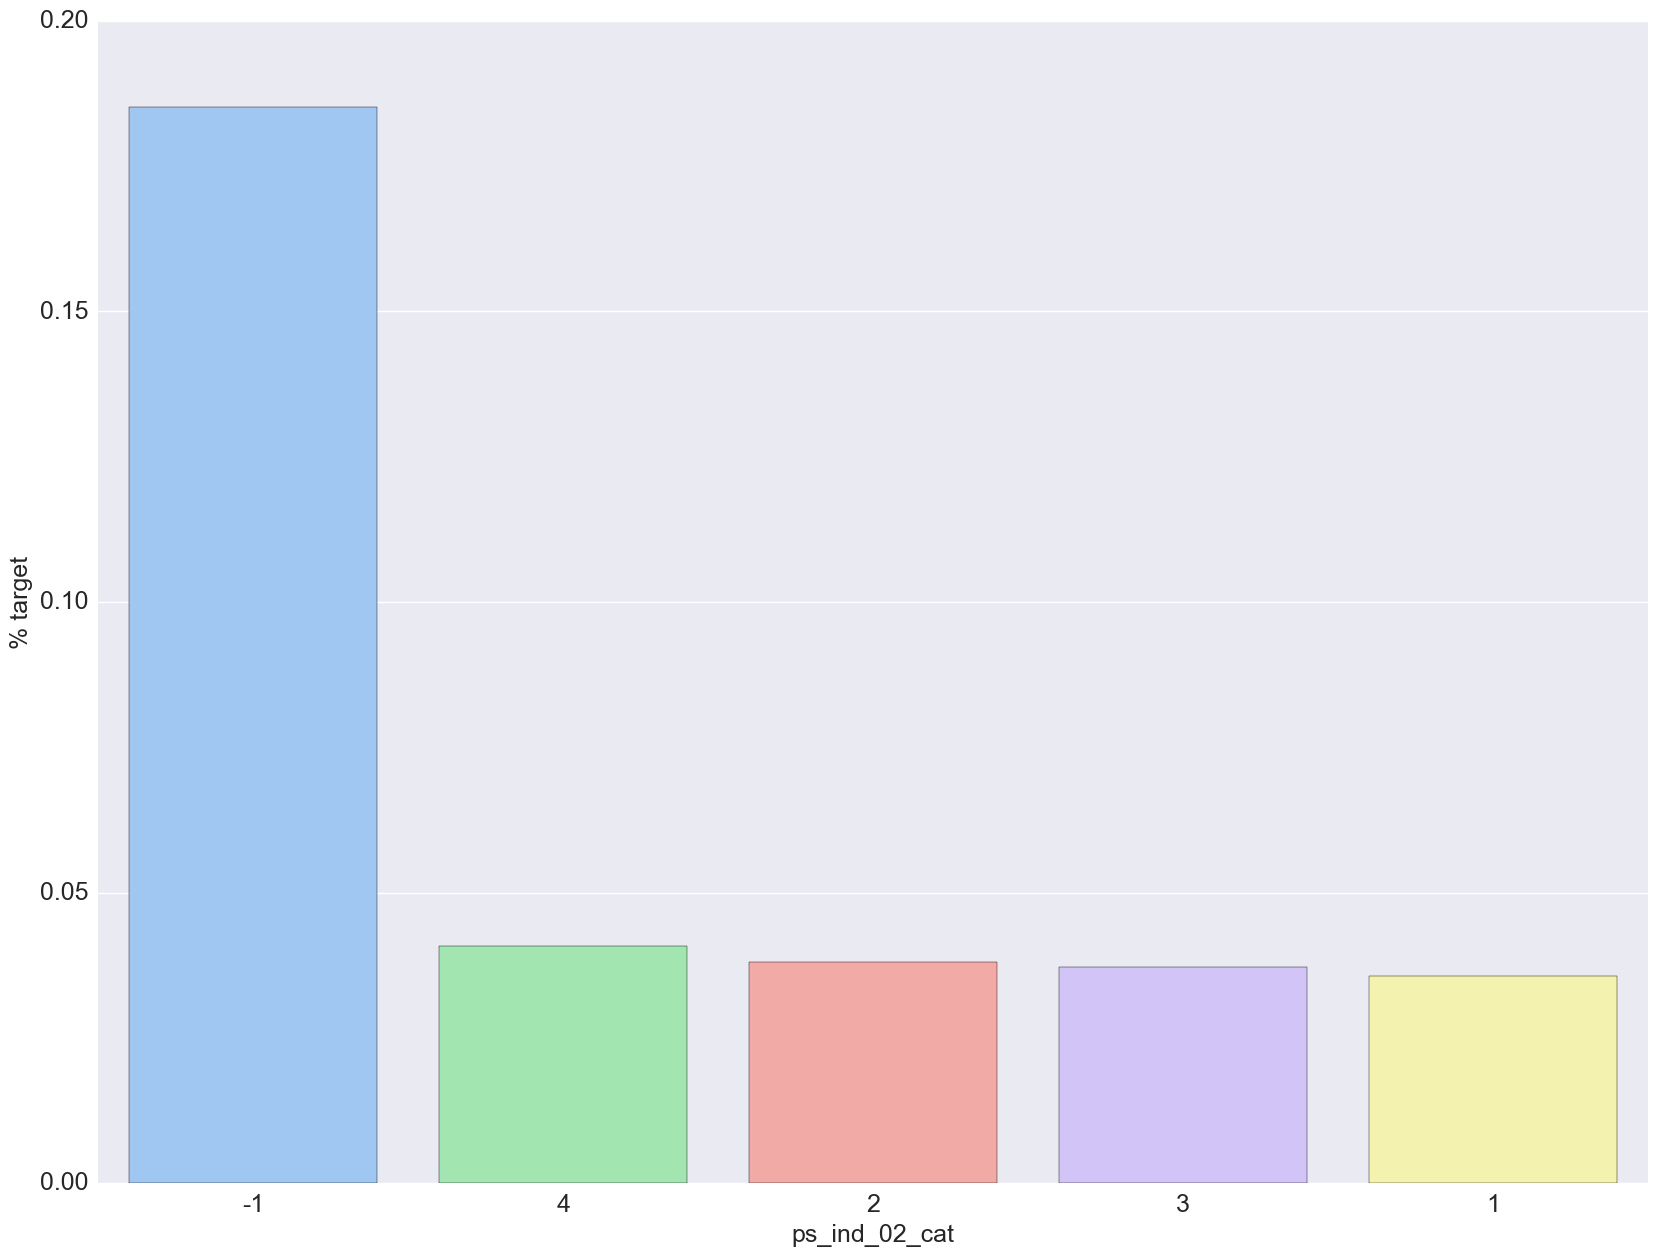

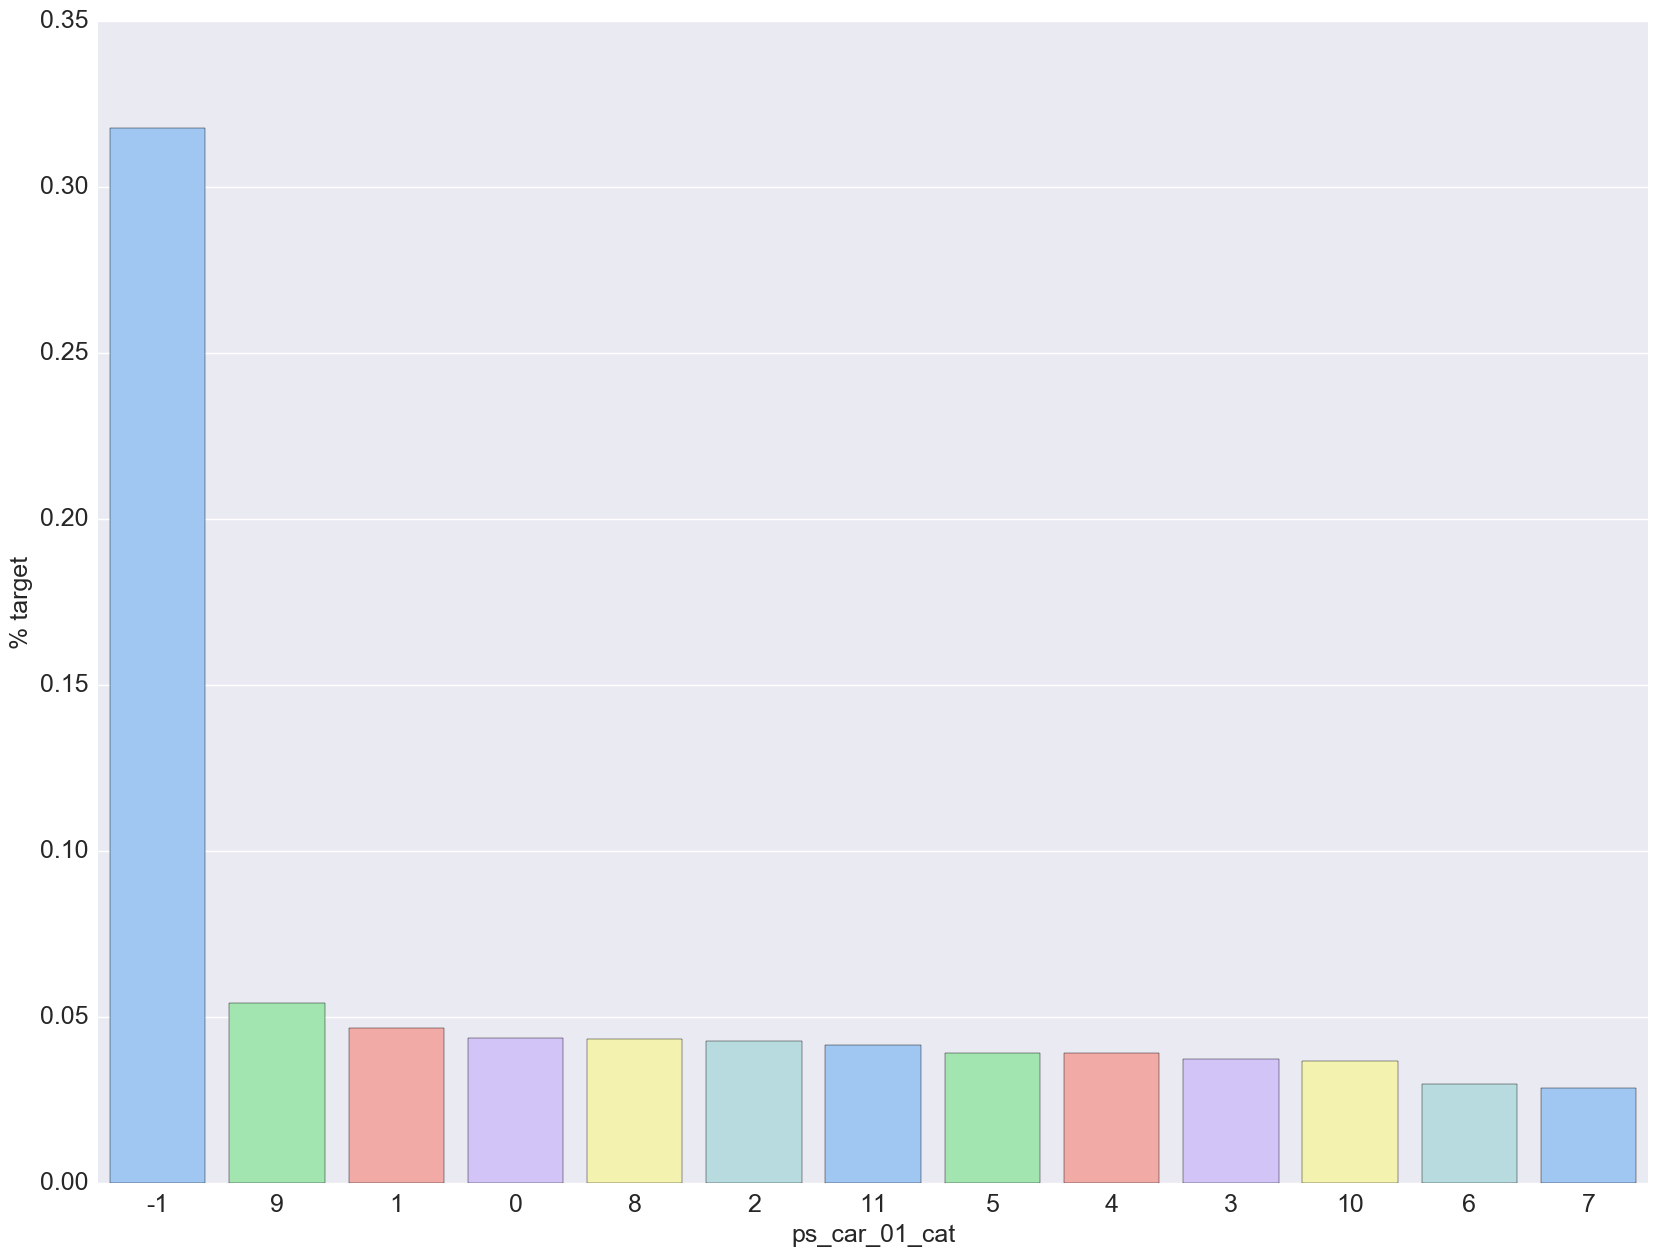

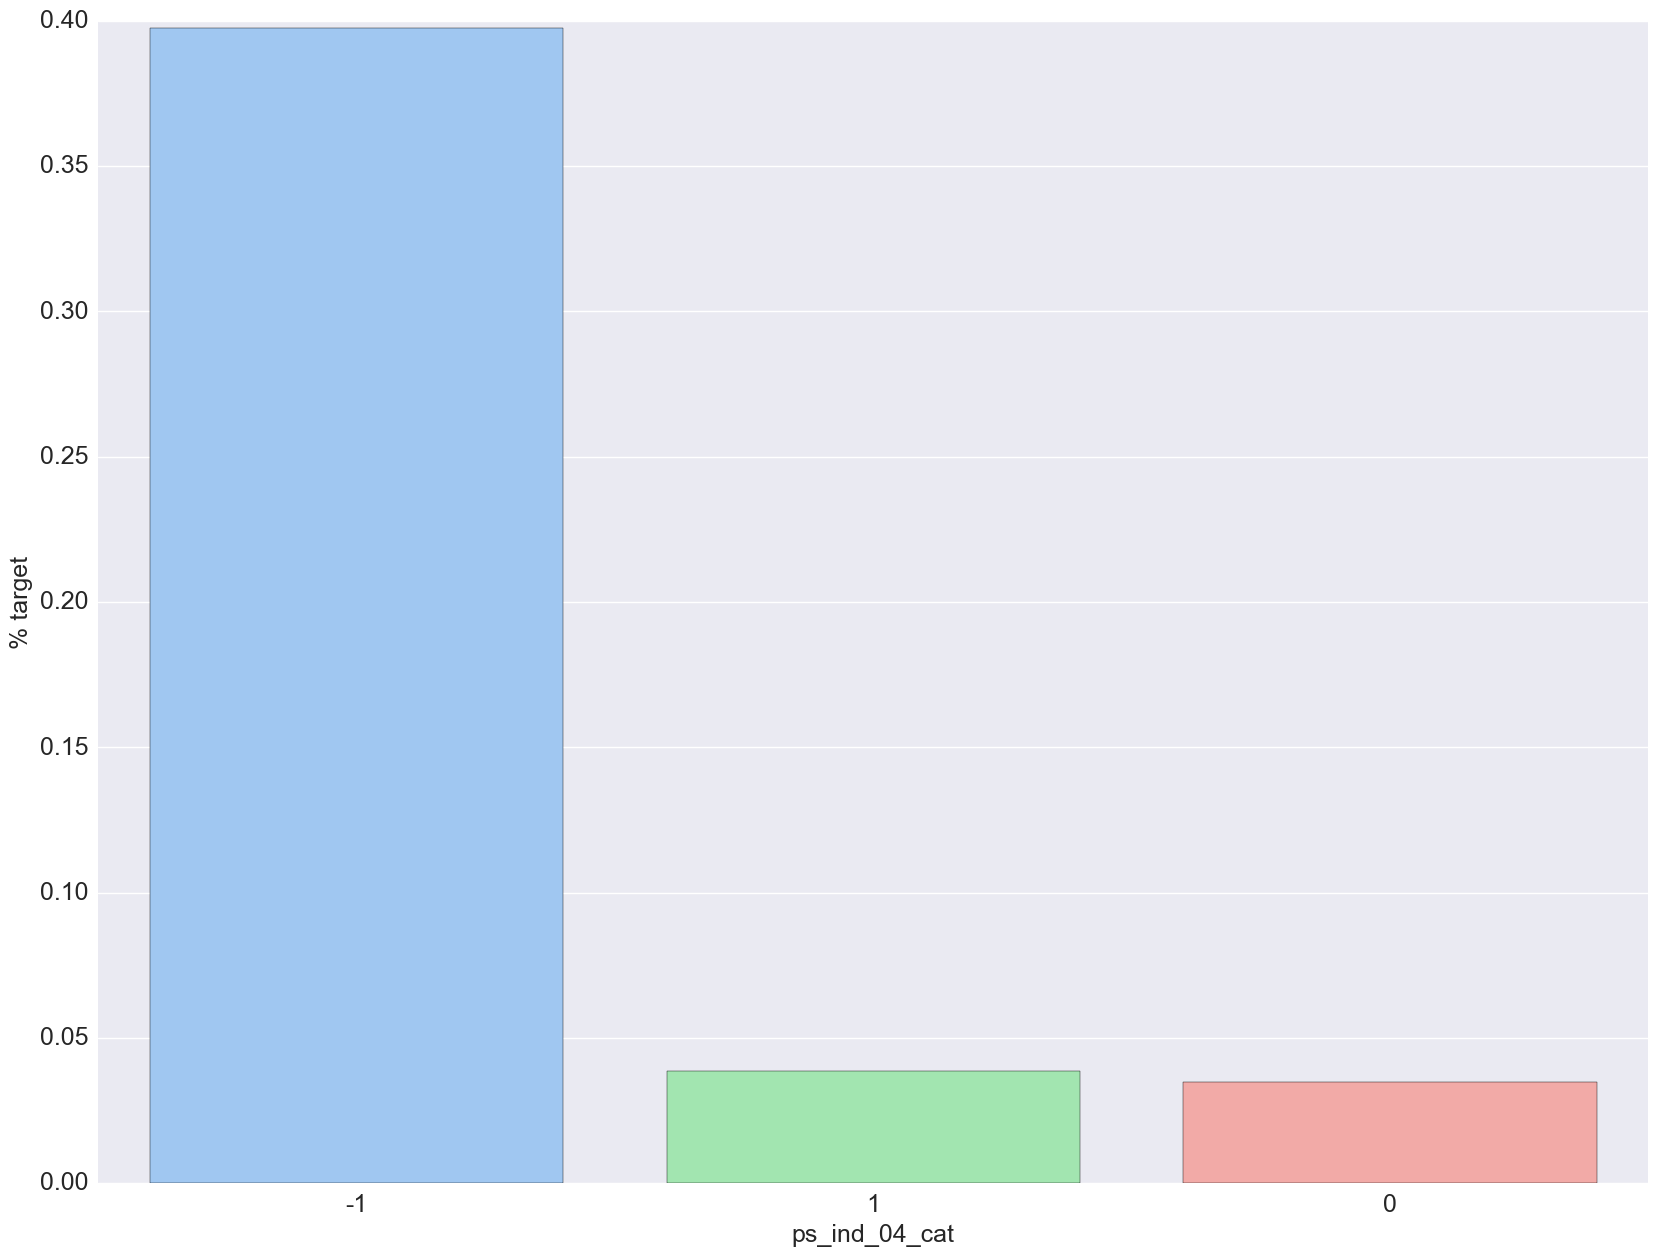

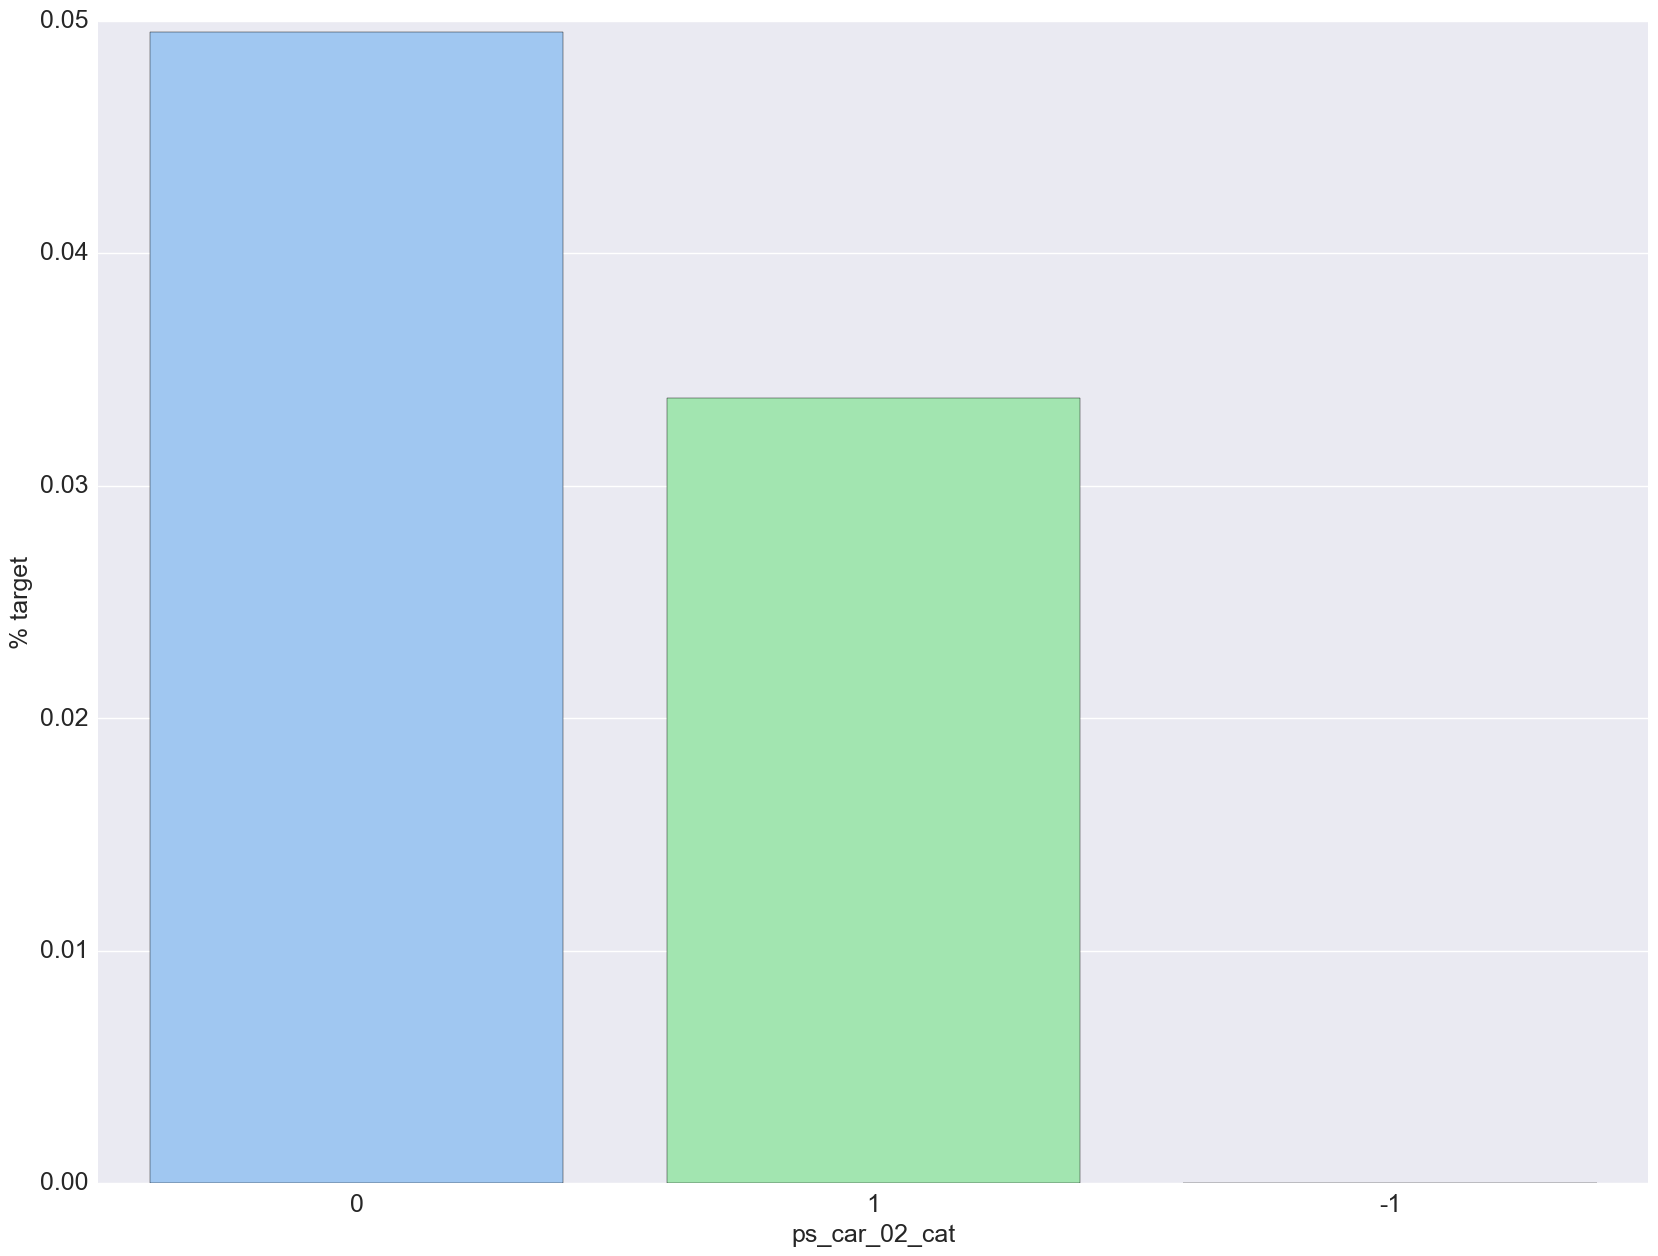

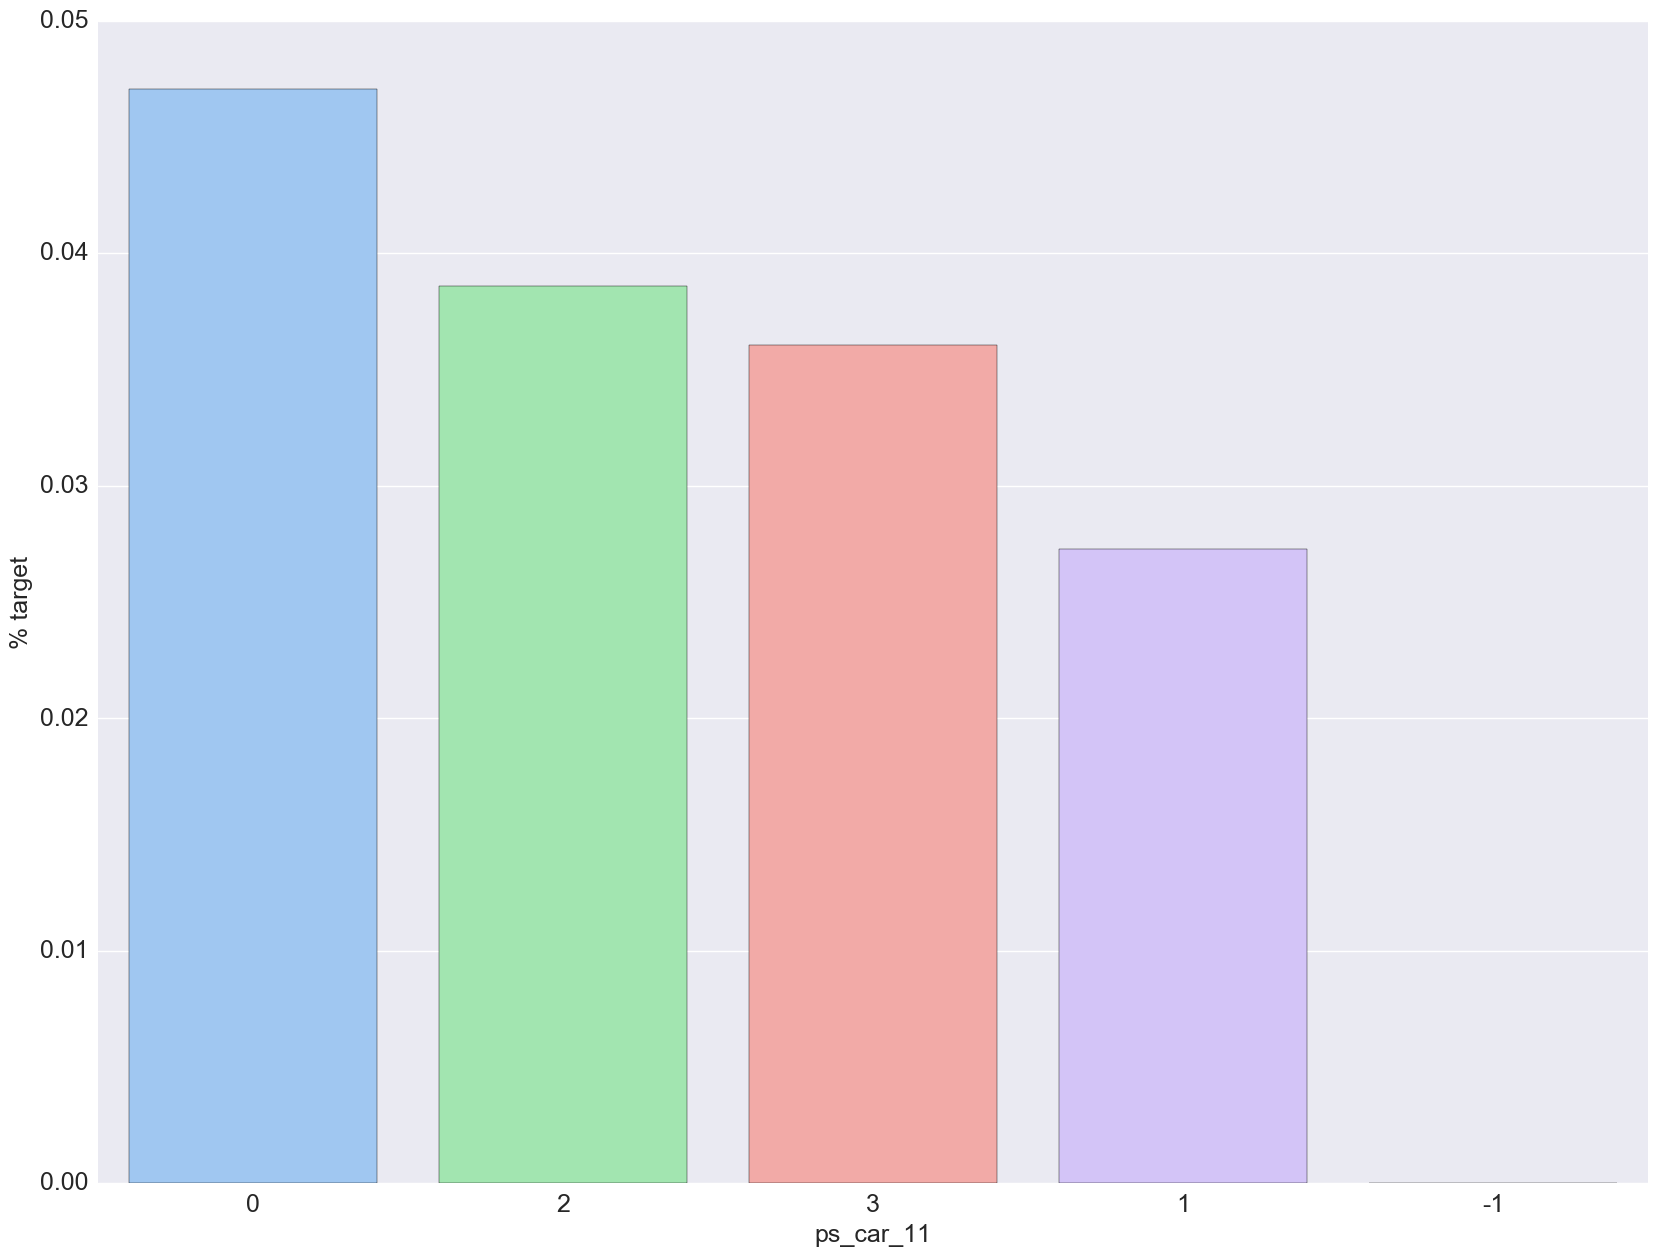

In [20]:
#Checking null values, comparing to column 'target' 
#Thanks to bertcarremans => https://www.kaggle.com/bertcarremans/data-preparation-exploration

nullColInt = ['ps_car_03_cat','ps_car_05_cat','ps_car_07_cat','ps_ind_05_cat','ps_car_09_cat',
           'ps_ind_02_cat','ps_car_01_cat','ps_ind_04_cat','ps_car_02_cat','ps_car_11']

#nullColOrd = ['ps_reg_03','ps_car_14','ps_car_12']

v = nullColInt

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,15))
    # Calculate the percentage of target=1 per category value
    cat_perc = dfTrain[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f],palette="pastel")
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();
    


Maybe it is a good idea to keep the missing values as a separate category value (-1). 
In most part of the cases, missing values appear to have a much higher probability to ask for an insurance claim (target =1).

### 5) Validate with at least one external data source 

For this competition is not allowed to use another data sources to get more information. <br>
We can infer some information based on Porto Seguro's documentation, like this one (in portuguese):<br>  http://www.portoseguro.com.br/static-files/Institucional/Documento/SeguroAuto/Condi%C3%A7%C3%B5es%20Gerais/CG60.pdf <br> and using their site to simulate: https://wwws.portoseguro.com.br/vendaonline/automovel/home.ns

### 6) Make a plot 

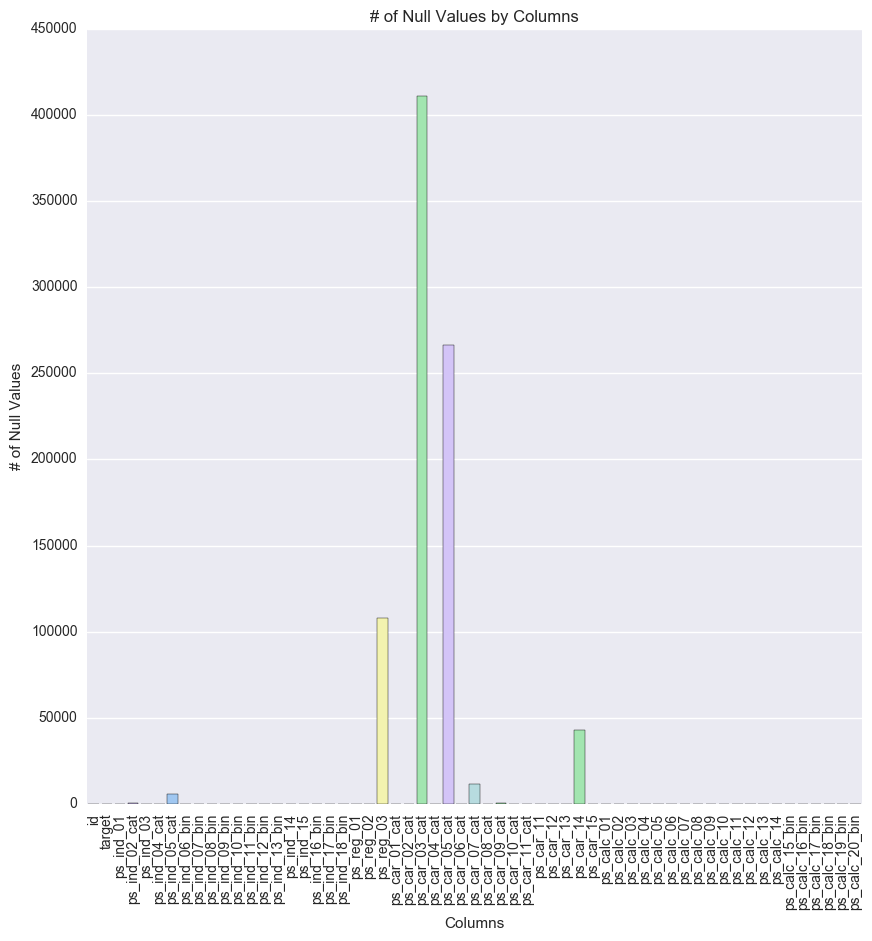

In [21]:
#Plotting null values on train dataset

def plotNull(df) :
    cols = [col for col in df.columns]
    counts = []
    
    for col in cols:
        counts.append((df[col].isnull()).sum())
    
    plt.figure(figsize=(10,10))
    plt.title('# of Null Values by Columns')
    plt.xlabel('Columns')
    plt.ylabel('# of Null Values')
    ax = sns.barplot(x=cols,  y=counts, orient='v', palette="pastel")
    #ax = sns.barplot(x=counts, y=cols, orient='h', palette="pastel")
    plt.xticks(rotation=90)
    #plt.yscale('log')
    plt.show()
    
    
plotNull(dfTrain_v2)

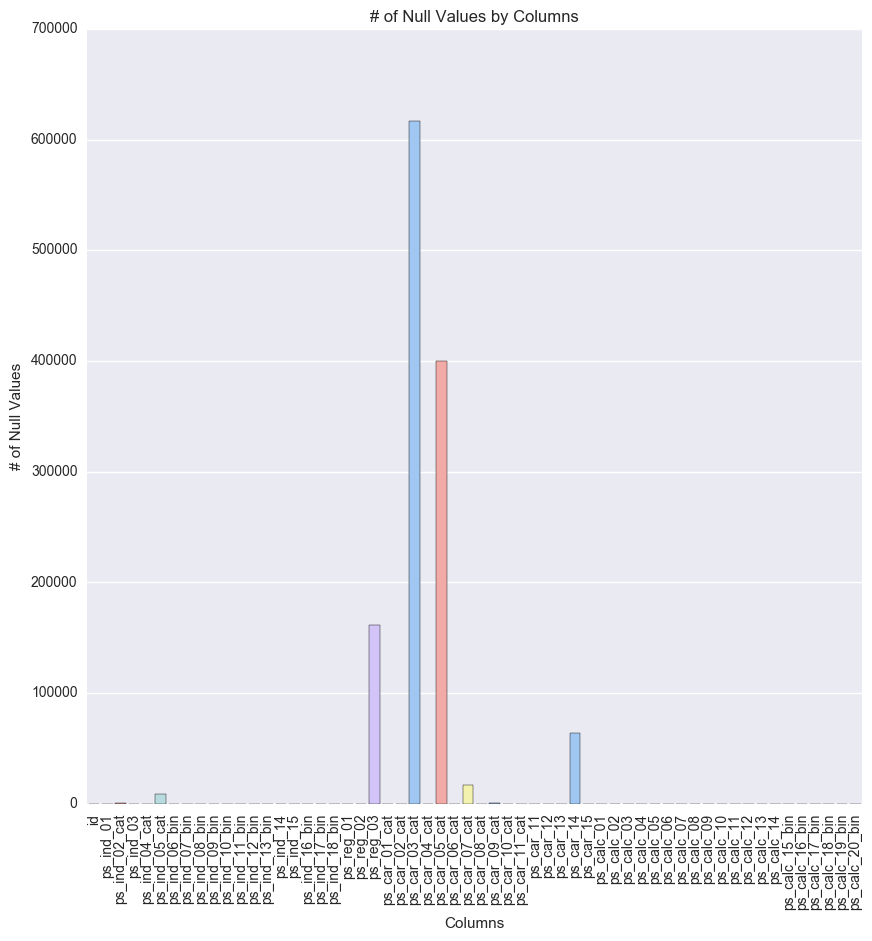

In [22]:
#Plotting null values on test dataset
plotNull(dfTest_v2)

As we can see previously, the % of null values in train and test dataset are very similar.

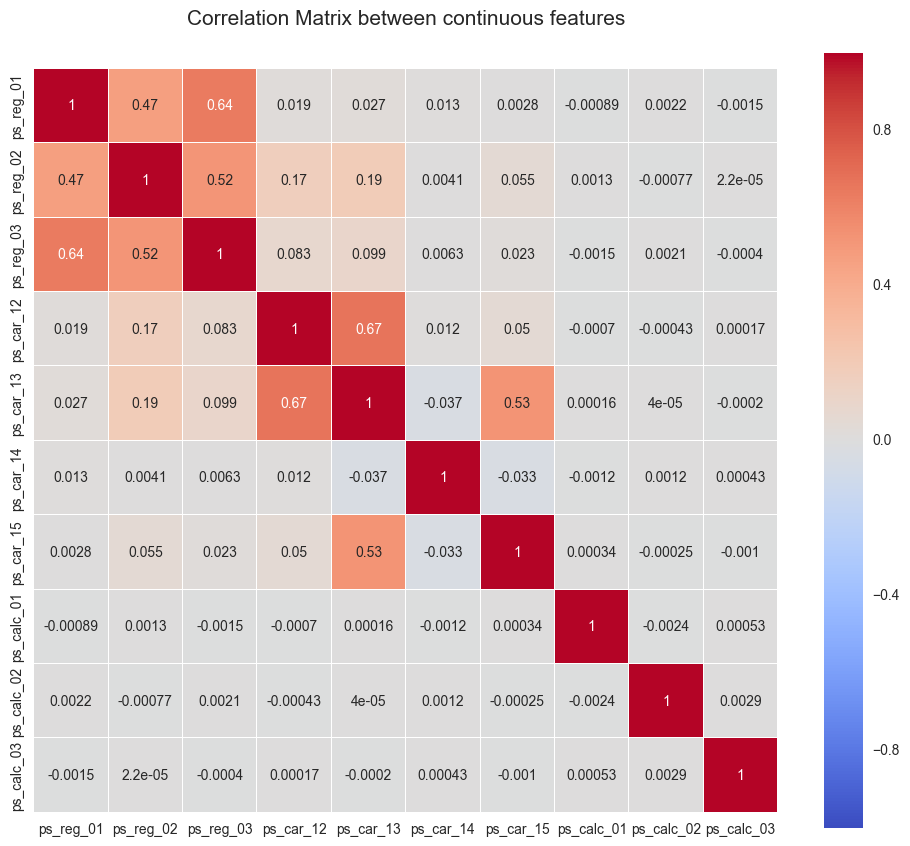

In [23]:
#Correlation Matrix Between continuous features
plt.figure(figsize=(12,10))
plt.title('Correlation Matrix between continuous features', y=1.05, size=15)
sns.heatmap(trainFloat.corr(),linewidths=0.1,vmax=1.0, square=True, cmap="coolwarm", linecolor='white', annot=True)

Correlations: <br>
ps_car_12 and ps_car_13 = 0.67 <br>
ps_reg_01 and ps_reg_03 = 0.64 <br>
ps_car_13 and ps_car_15 = 0.53 <br>
ps_reg_02 and ps_reg_03 = 0.52  <br><br>
(ps_calc_01, ps_calc_02 and ps_calc_03 ) seems have very low correlation with other features

In [24]:
trainInt.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

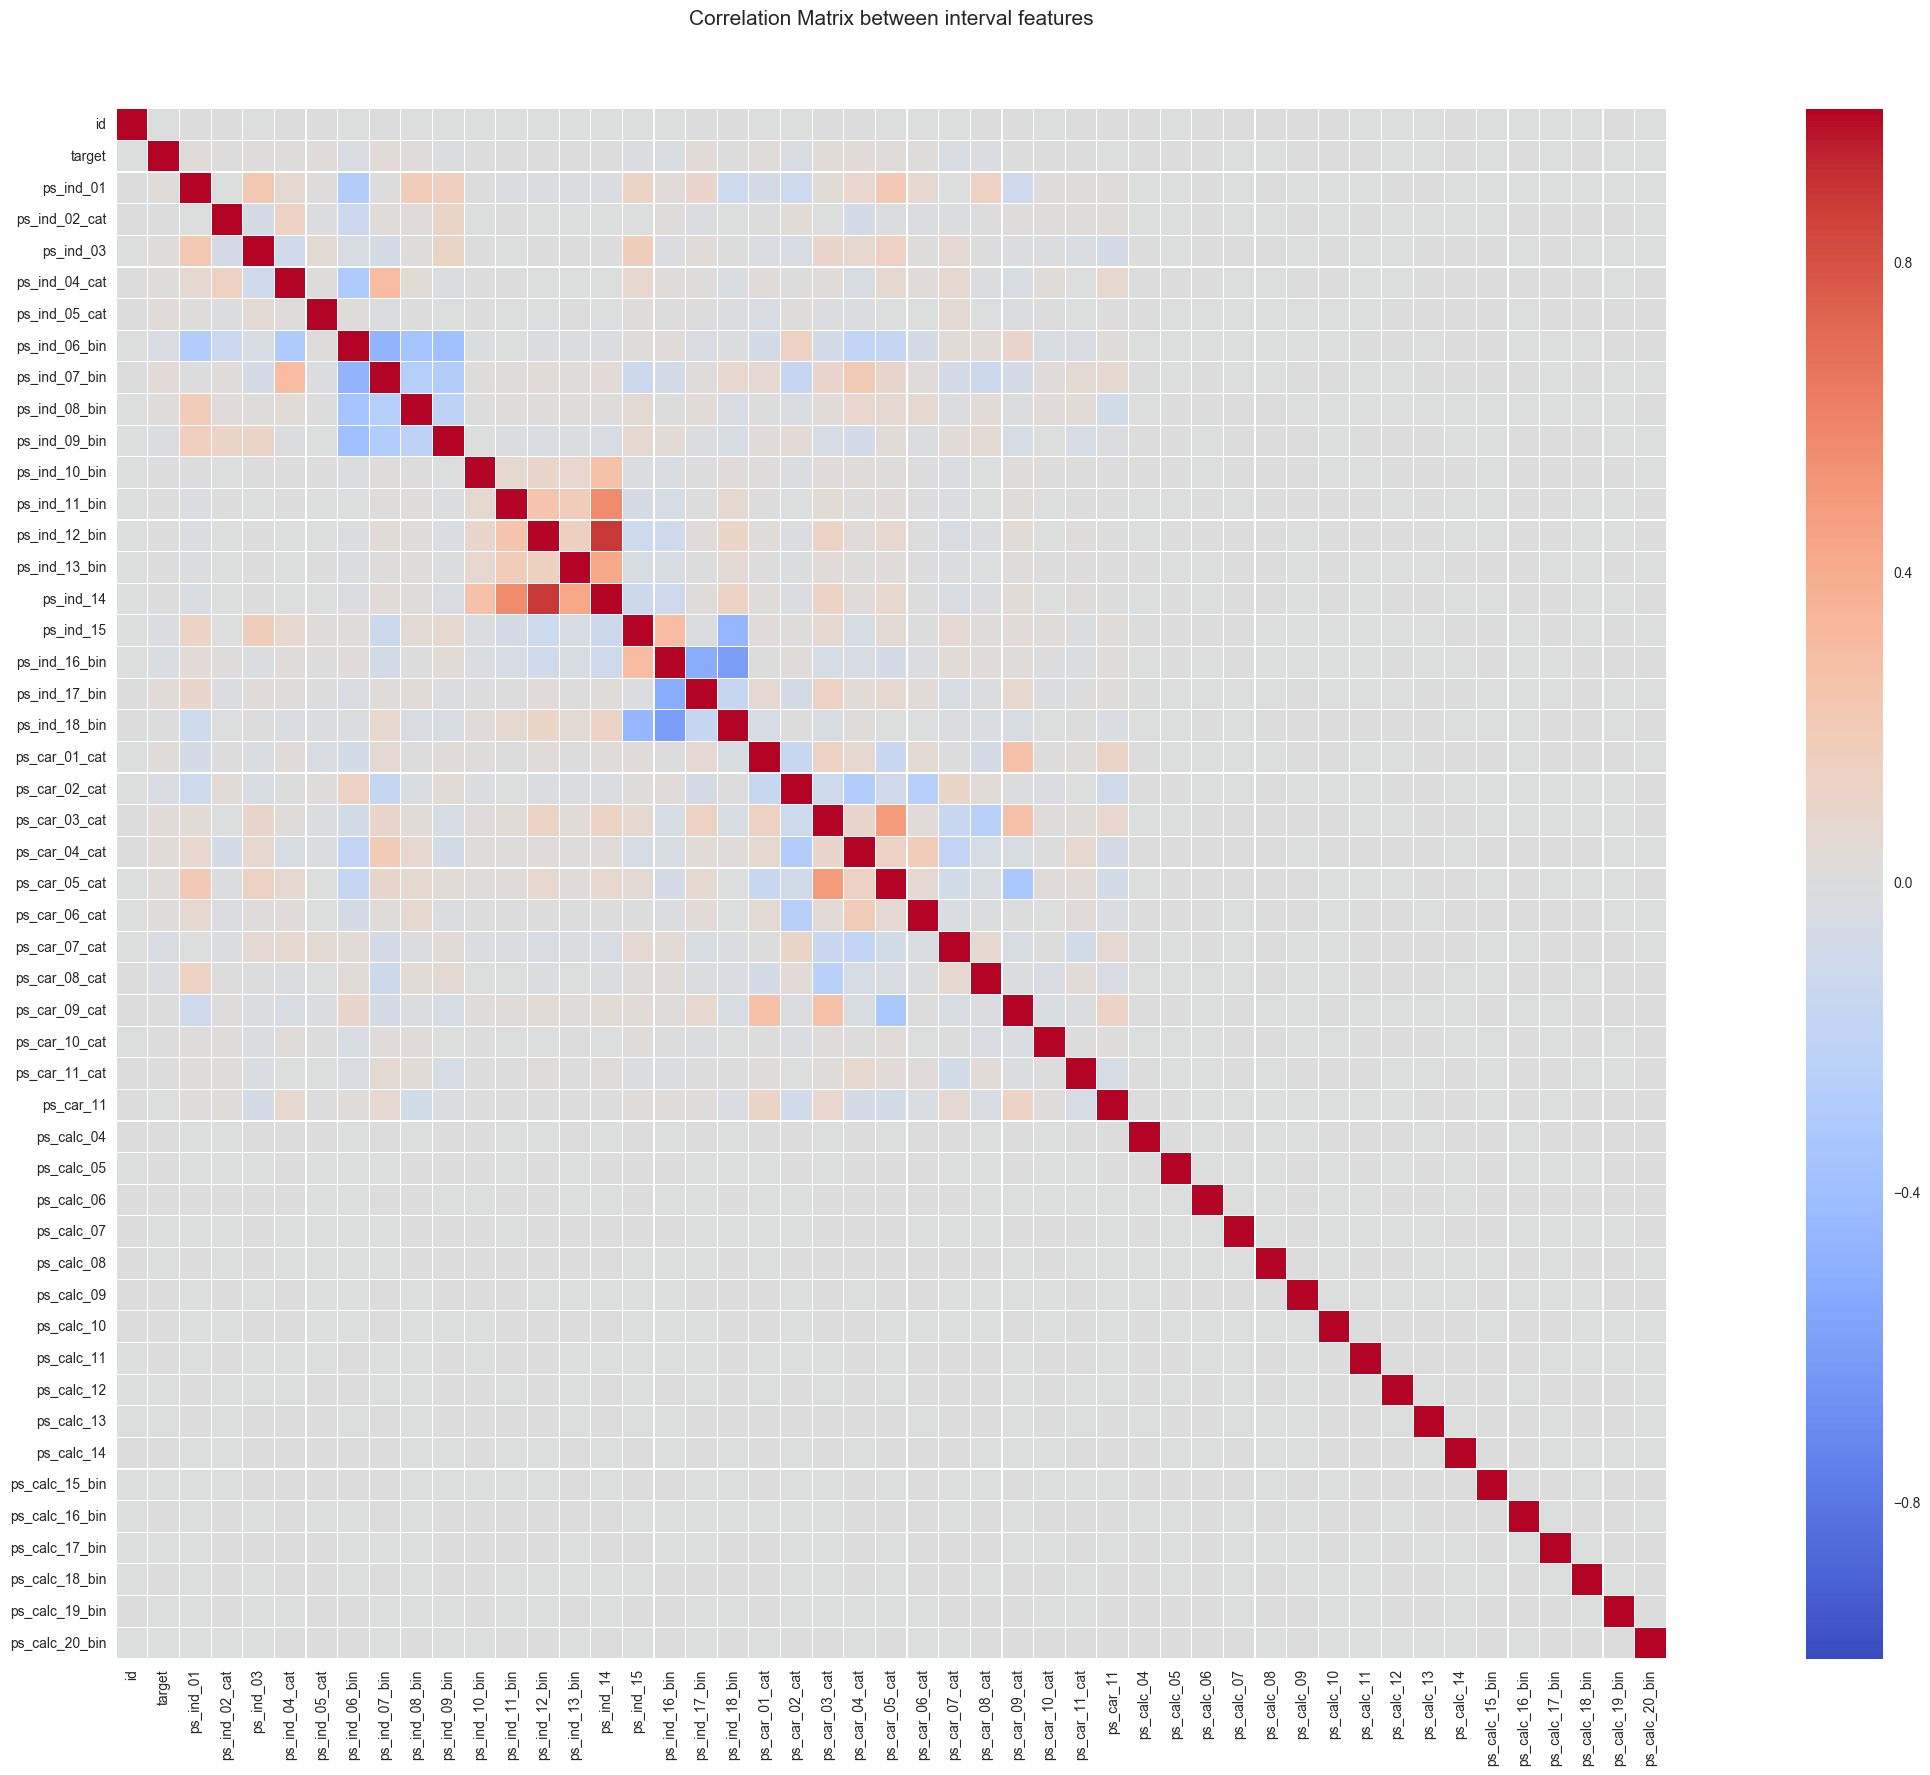

In [25]:
plt.figure(figsize=(36,20))
plt.title('Correlation Matrix between interval features', y=1.05, size=15)
sns.heatmap(trainInt.corr(),linewidths=0.1,vmax=1.0, square=True, cmap="coolwarm", linecolor='white', annot=False)

Correlations: <br>
ps_ind_12_bin and ps_ind_14 = 0.89 <br>
ps_ind_11_bin and ps_ind_14 = 0.56 <br><br>
'ps_calc_xx' columns and 'ps_calc_xx_bin' columns seems has very low correlation with other columns.  

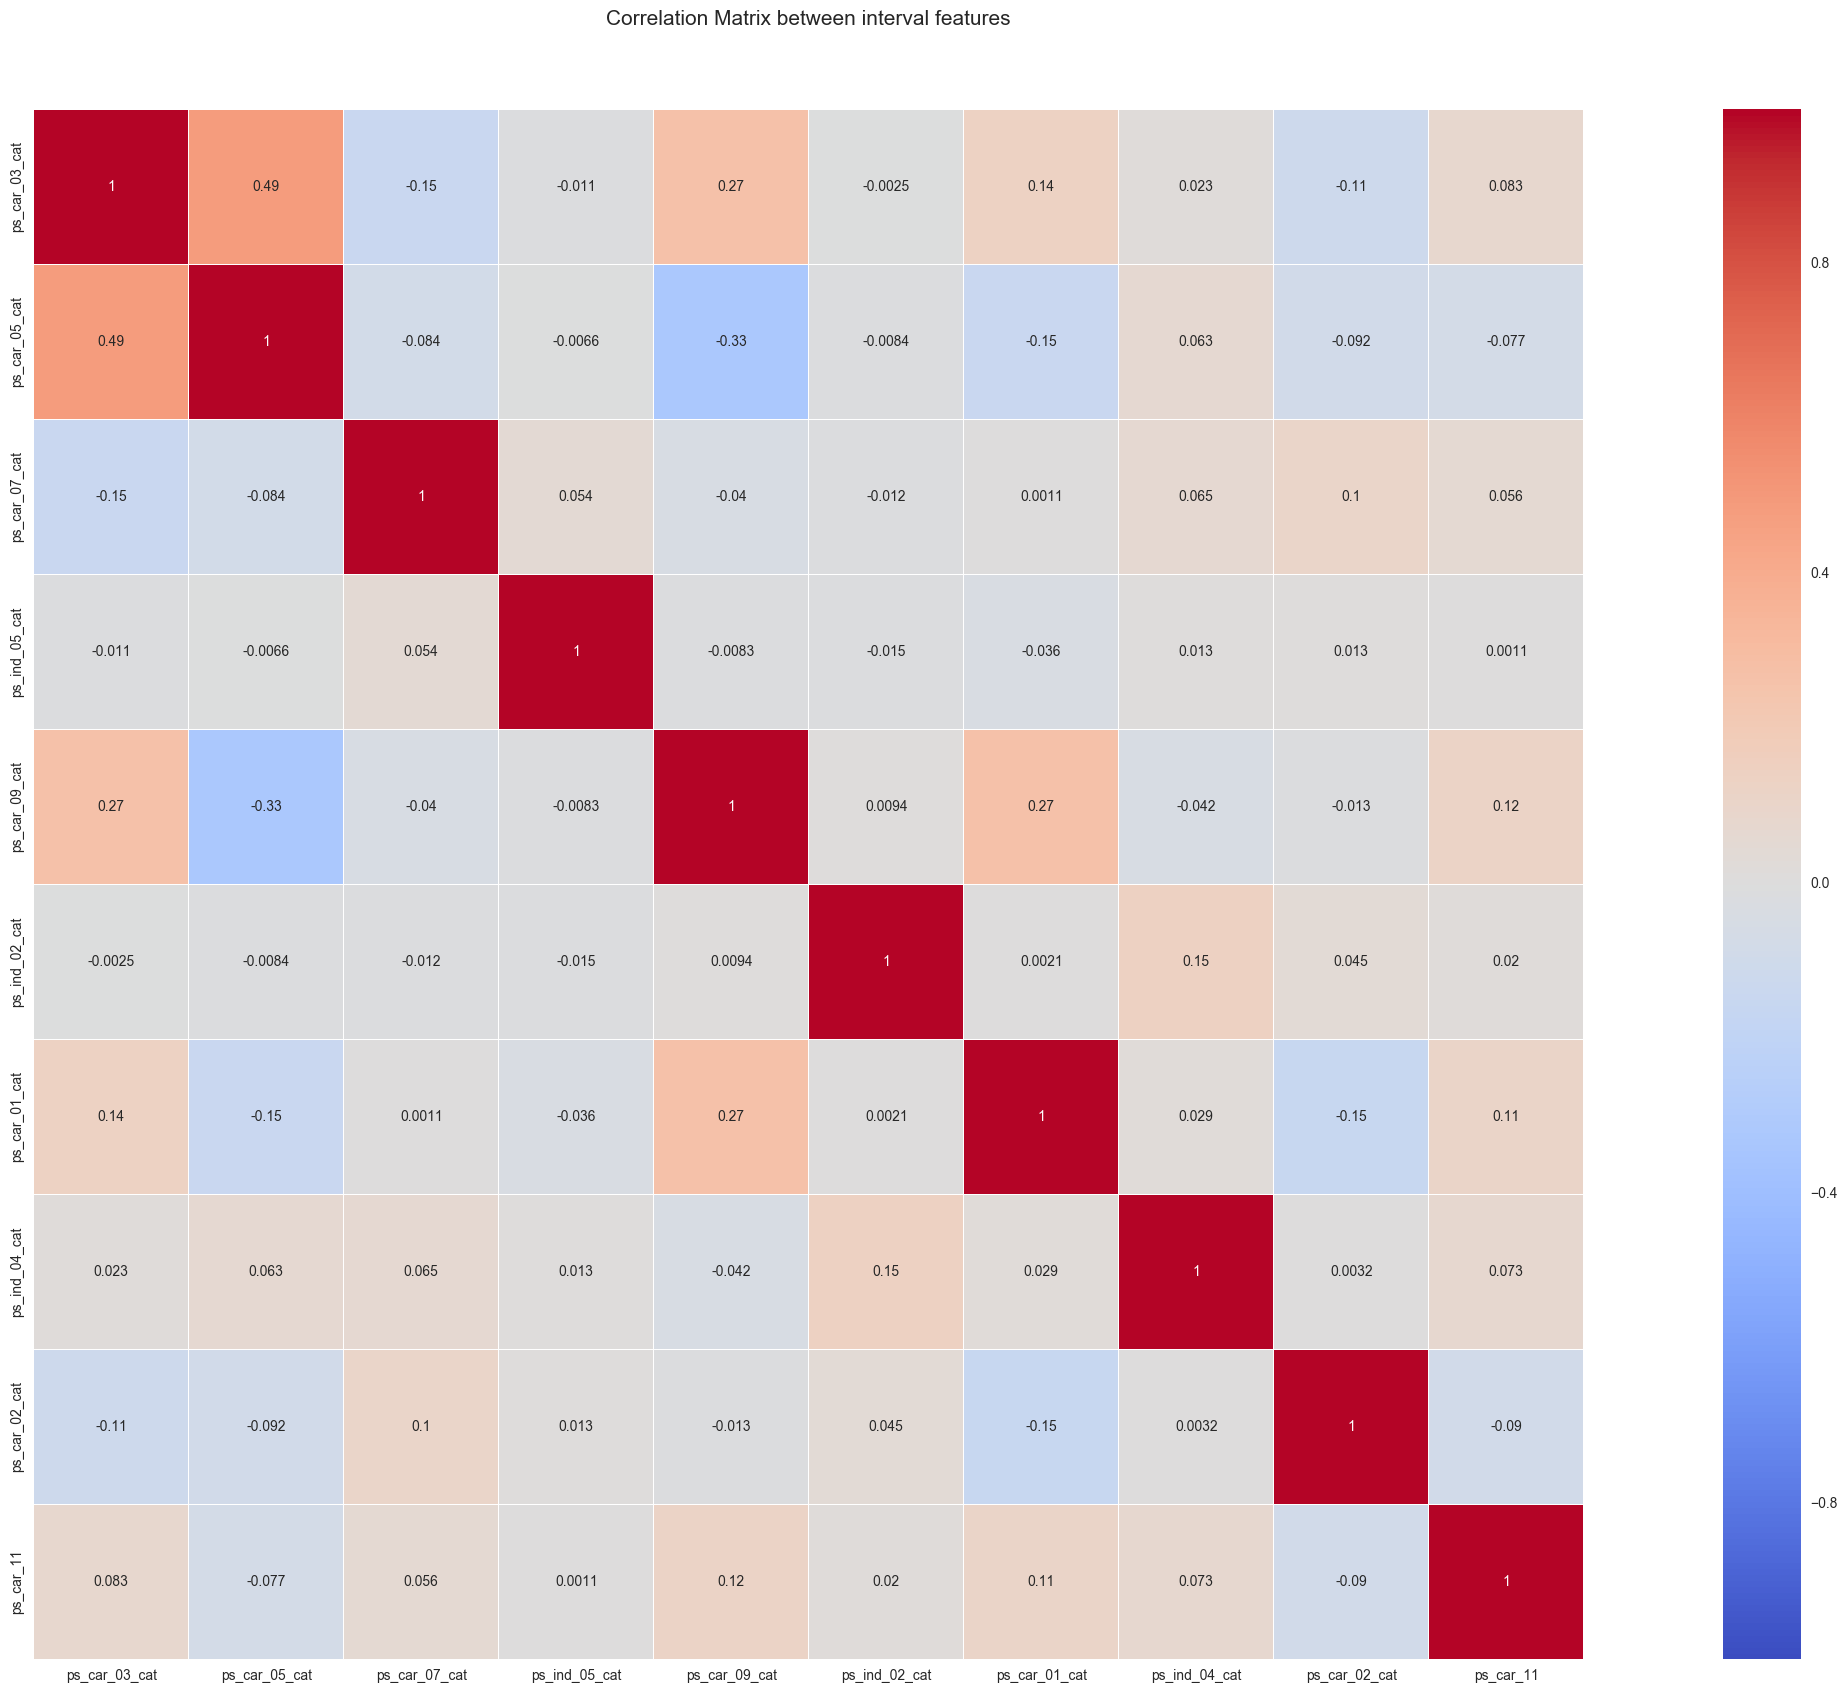

In [26]:
# Ploting correlation matrix without '_calc' features
trainIntNotCalc = dfTrain.loc[:, nullColInt]
plt.figure(figsize=(36,20))
plt.title('Correlation Matrix between interval features', y=1.05, size=15)
sns.heatmap(trainIntNotCalc.corr(),linewidths=0.1,vmax=1.0, square=True, cmap="coolwarm", linecolor='white', annot=True)

In [3]:
#Getting '_calc' columns and dropping them from train and test datasets
dfTrain_v3 = dfTrain
calcCol = [col for col in dfTrain.columns if '_calc' in col]
dfTrain_v3 = dfTrain_v3.drop(calcCol, axis=1)
dfTest_v3 = dfTest
calcColTest = [col for col in dfTest.columns if '_calc' in col]
dfTest_v3 = dfTest_v3.drop(calcColTest, axis=1)

In [28]:
dfTrain_v3.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15'],
      dtype='object')

In [29]:
dfTrain_v3.shape

(595212, 39)

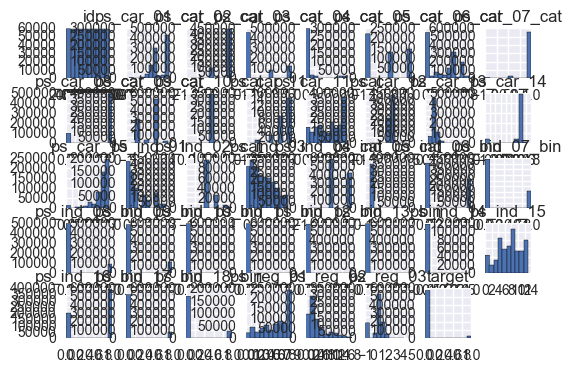

In [30]:
# Histogram
dfTrain_v3.hist(layout=(5,8))
plt.show()

In [31]:
# Target Column distribution
dfTrain_v3.groupby('target').size()

target
0    573518
1     21694
dtype: int64

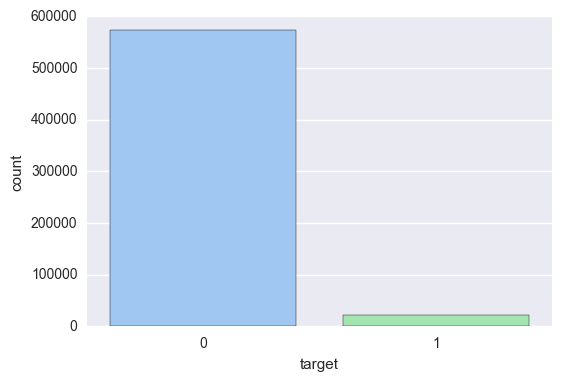

In [32]:
# Plotting Target Column
sns.countplot(x="target", data=dfTrain, palette="pastel")

As we can see, we have much more examples of not filling for insurance that the opposite in column target 

Handling imbalanced classes ===> Copied shamelessly from: https://www.kaggle.com/bertcarremans/data-preparation-exploration <br>

As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are:

oversampling records with target=1
undersampling records with target=0
There are many more strategies of course and MachineLearningMastery.com gives a nice overview. As we have a rather large training set, we can go for undersampling.

In [4]:
from sklearn.utils import shuffle
desired_apriori=0.10

# Get the indices per target value
idx_0 = dfTrain_v3[dfTrain_v3.target == 0].index
idx_1 = dfTrain_v3[dfTrain_v3.target == 1].index

# Get original number of records per target value
nb_0 = len(dfTrain_v3.loc[idx_0])
nb_1 = len(dfTrain_v3.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
dfTrain_v3 = dfTrain_v3.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


In [34]:
dfTrain_v3.shape

(216940, 39)

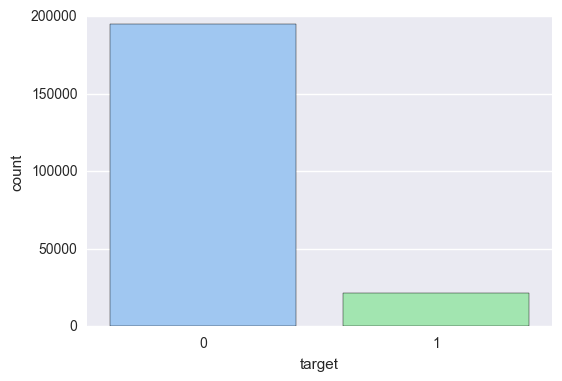

In [35]:
# Plotting Target Column
sns.countplot(x="target", data=dfTrain_v3, palette="pastel")

In [22]:
dfTrain_v4 = dfTrain_v3
dfTest_v4 = dfTest_v3
#catColumns = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
#       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
#       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
#       'ps_car_10_cat', 'ps_car_11_cat']
catColumns = [col for col in dfTrain_v3.columns if '_cat' in col]

In [23]:
#Dummy variables
dfTrain_v4 = pd.get_dummies(dfTrain_v4, columns=catColumns, drop_first=True)
dfTest_v4 = pd.get_dummies(dfTest_v4, columns=catColumns, drop_first=True)

In [24]:
dfTrain_v4.shape

(216940, 195)

In [21]:
dfTrain_v4.head(4)

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,353762,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,845629,0,5,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1449185,0,4,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,834066,0,6,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Selection

In [25]:
#Selecting features with a Random Forest and SelectFromModel
'''
Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromModel 
you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. 
But we'll simply select the top 50% best variables.

The code in the cell below is borrowed from the GitHub repo of Sebastian Raschka. This repo contains code samples of 
his book Python Machine Learning, which is an absolute must to read.
'''

from sklearn.ensemble import RandomForestClassifier

X_train = dfTrain_v4.drop(['id', 'target'], axis=1)
y_train = dfTrain_v4['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))


 1) ps_car_13                      0.086235
 2) ps_reg_03                      0.078839
 3) ps_ind_15                      0.057138
 4) ps_ind_03                      0.054471
 5) ps_reg_02                      0.052770
 6) ps_car_14                      0.050663
 7) ps_car_15                      0.043800
 8) ps_reg_01                      0.042903
 9) ps_ind_01                      0.042579
10) ps_car_12                      0.028577
11) ps_car_11                      0.015876
12) ps_car_05_cat_1                0.011697
13) ps_ind_04_cat_0                0.011648
14) ps_ind_04_cat_1                0.011585
15) ps_car_05_cat_0                0.011539
16) ps_ind_02_cat_1                0.011239
17) ps_car_01_cat_11               0.011124
18) ps_car_09_cat_2                0.011067
19) ps_ind_16_bin                  0.010169
20) ps_ind_02_cat_2                0.009448
21) ps_car_09_cat_0                0.009216
22) ps_car_01_cat_7                0.009134
23) ps_ind_07_bin               

In [26]:
#With SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances. 
#With the get_support method we can then limit the number of variables in the train data.

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.00150, prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 193
Number of features after selection: 89


In [27]:
dfTrain_v5 = dfTrain_v4[selected_vars + ['target']]
#dfTest_v5 = dfTest_v4[selected_vars]
del dfTrain_v4

In [28]:
dfTest_v5 = dfTest_v4[selected_vars + ['id']]
del dfTest_v4

In [29]:
dfTrain_v5.to_csv(path_or_buf='output/train_formated_3.csv', sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.')

In [30]:
dfTest_v5.to_csv(path_or_buf='output/test_formated_3.csv', sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.')